# **BrainStation Capstone Project - Video Game Recommendation System**
#**Part 1: Data Processing and Exploratory Data Analysis**
# **Joshua Sunga**

# Data Cleaning: Video Games Product Metadata Dataset

In this section, I will load the Video Games Product Metadata Dataset and clean it.

## Load Video Games Product Metadata Dataset

In [1]:
# import relevant packages
import os
import json
import gzip
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from urllib.request import urlopen

In [2]:
# get metadata direct from UCSD website
!wget http://deepyeti.ucsd.edu/jianmo/amazon/metaFiles2/meta_Video_Games.json.gz

--2022-09-16 06:24:10--  http://deepyeti.ucsd.edu/jianmo/amazon/metaFiles2/meta_Video_Games.json.gz
Resolving deepyeti.ucsd.edu (deepyeti.ucsd.edu)... 169.228.63.50
Connecting to deepyeti.ucsd.edu (deepyeti.ucsd.edu)|169.228.63.50|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53175983 (51M) [application/octet-stream]
Saving to: ‘meta_Video_Games.json.gz.3’

meta_Video_Games.js 100%[===================>]  50.71M  27.0MB/s    in 1.9s    

2022-09-16 06:24:12 (27.0 MB/s) - ‘meta_Video_Games.json.gz.3’ saved [53175983/53175983]



In [3]:
# load the data

data = []
with gzip.open('meta_Video_Games.json.gz') as f:
    for l in f:
        data.append(json.loads(l.strip()))
    
# total length of list, this number equals total number of products
print("Number of Video Games Products:", len(data))

Number of Video Games Products: 84819


In [4]:
# convert list into pandas dataframe. here, we will create metadata_df

metadata_df = pd.DataFrame.from_dict(data)

print("Number of Video Games Products:", len(metadata_df))

Number of Video Games Products: 84819


In [5]:
# get info on all columns
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84819 entries, 0 to 84818
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   category         84819 non-null  object
 1   tech1            84819 non-null  object
 2   description      84819 non-null  object
 3   fit              84819 non-null  object
 4   title            84819 non-null  object
 5   also_buy         84819 non-null  object
 6   tech2            84819 non-null  object
 7   brand            84819 non-null  object
 8   feature          84819 non-null  object
 9   rank             84819 non-null  object
 10  also_view        84819 non-null  object
 11  main_cat         84819 non-null  object
 12  similar_item     84819 non-null  object
 13  date             84819 non-null  object
 14  price            84819 non-null  object
 15  asin             84819 non-null  object
 16  imageURL         84819 non-null  object
 17  imageURLHighRes  84819 non-null

In [6]:
# see the first five rows of the dataframe
metadata_df.head()

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details
0,"[Video Games, PC, Games]",,[],,Reversi Sensory Challenger,[],,Fidelity Electronics,[],"[>#2,623,937 in Toys &amp; Games (See Top 100 ...",[],Toys &amp; Games,,,,0042000742,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
1,"[Video Games, Xbox 360, Games, </span></span><...",,[Brand new sealed!],,Medal of Honor: Warfighter - Includes Battlefi...,[B00PADROYW],,by\n \n EA Games,[],"[>#67,231 in Video Games (See Top 100 in Video...","[B0050SY5BM, B072NQJCW5, B000TI836G, B002SRSQ7...",Video Games,,,"\n\t\t\t\t\t\t\t\t\t\t\t\t<span class=""vertica...",0078764343,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
2,"[Video Games, Retro Gaming & Microconsoles, Su...",,[],,street fighter 2 II turbo super nintendo snes ...,[],,Nintendo,[],"[>#134,433 in Video Games (See Top 100 in Vide...",[],Video Games,,,$0.72,0276425316,[],[],NaN
3,"[Video Games, Xbox 360, Accessories, Controlle...",,[MAS's Pro Xbox 360 Stick (Perfect 360 Stick) ...,,Xbox 360 MAS STICK,[],,by\n \n MAS SYSTEMS,[Original PCB used from Xbox 360 Control Pad (...,"[>#105,263 in Video Games (See Top 100 in Vide...",[],Video Games,,,,0324411812,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
4,"[Video Games, PC, Games, </span></span></span>...",,"[Phonics Alive! 3, The Speller teaches student...",,Phonics Alive! 3: The Speller,[],,by\n \n Advanced Software Pty. Ltd.,"[Grades 2-12, Spelling Program, Teaches Spelli...","[>#92,397 in Video Games (See Top 100 in Video...",[B000BCZ7U0],Video Games,,,,0439335310,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN


## Removal of Columns

In this section, I will remove columns from `metadata_df` that will not be used in this project.

The following columns will be removed:


*   `rank`: This column contains the sales performance ranking for each product. This column won't be used as the Funk SVD recommender system will not be able to ingest it.
*   `tech1`: This column is supposed to contain technical features for each product. While this column is present for the other metadata datasets for other Amazon categories, it is empty for the Video Games category.
*   `tech2`: This column is supposed to contain technical features for each product. While this column is present for the other metadata datasets for other Amazon categories, it is empty for the Video Games category.
*   `fit`: This column is meant to apply to Amazon's fashion categories. It is empty for othe Video Games category.
*   `main_cat`: This column is meant to contain each product's main category assignment. However, given that most of the products in this dataset belong to the Video Games category, it is redundant. The category information we need is held in the `category` column.
*   `similar_item`: This column contains products that are similar. Most products in this dataset have this column empty.
*   `imageURL`: This column contains the URL to product images that form part of the product listing on Amazon. This is not relevant for our purposes.
*   `imageURLHighRes`: This column contains the high resolution image URL that form part of the product listing on Amazon. This is not relevant for our purposes.
*   `price`: This column would be useful for our project. Unfortunately, it is mostly empty.
*   `date`: I assume this column would contain the launch date for each product. Unfortunately, it is empty.
*   `details`: I assume this column is supposed to contain details about each product. Unfortunately, this column is empty. Details for each product seem to all be spread out among the `category`, `description`, `brand`, and `title` columns.
*   `description`: This column will not be used as part of the exploratory data analysis as we have enough information in the `brand`, `category`, and `title` columns to move forward.
*   `also_buy`: Only some products have this column populated. This column will not be used as part of the recommendation system.
*   `also_view`: Only some products have this column populated. This column will not be used as part of the recommendation system.
*   `feature`: Only some products have this column populated. We already have the information we need in the `brand`, `category`, and `title` columns.
*.  `brand`: Nintendo has the most products at just over 2,000. Given this, there are many brands with only just one product. I have decided to remove brand from consideration.


















In [7]:
# drop columns
metadata_df = metadata_df.drop(['rank', 'tech1', 'tech2', 'fit', 'main_cat', 'similar_item', 'imageURL', 'imageURLHighRes', 'price', 'date', 'details', 'description', 'also_buy', 'also_view', 'feature', 'brand'], axis=1)

In [8]:
# check that columns were successfully dropped
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84819 entries, 0 to 84818
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  84819 non-null  object
 1   title     84819 non-null  object
 2   asin      84819 non-null  object
dtypes: object(3)
memory usage: 1.9+ MB


In [9]:
# check that columns were successfully dropped
metadata_df.head()

,category,title,asin
0,"[Video Games, PC, Games]",Reversi Sensory Challenger,0042000742
1,"[Video Games, Xbox 360, Games, </span></span><...",Medal of Honor: Warfighter - Includes Battlefi...,0078764343
2,"[Video Games, Retro Gaming & Microconsoles, Su...",street fighter 2 II turbo super nintendo snes ...,0276425316
3,"[Video Games, Xbox 360, Accessories, Controlle...",Xbox 360 MAS STICK,0324411812
4,"[Video Games, PC, Games, </span></span></span>...",Phonics Alive! 3: The Speller,0439335310


## Clean up `category` column

In this section, we will clean up the `category` column. This will be challenging given that the category column contains multiple descriptors for each product, as well as unwanted characters.

In [10]:
# check first five rows
metadata_df['category'].head()

0                             [Video Games, PC, Games]
1    [Video Games, Xbox 360, Games, </span></span><...
2    [Video Games, Retro Gaming & Microconsoles, Su...
3    [Video Games, Xbox 360, Accessories, Controlle...
4    [Video Games, PC, Games, </span></span></span>...
Name: category, dtype: object

In [11]:
# convert category column into string
metadata_df['category'] = [','.join(map(str, l)) for l in metadata_df['category']]

In [12]:
# remove html tags from column
from bs4 import BeautifulSoup
metadata_df['category'] = [BeautifulSoup(text).get_text() for text in metadata_df['category'] ]

In [13]:
# clean up
metadata_df.loc[metadata_df['category'].str.contains('PC Games'), 'category'] = 'PC Games'
metadata_df.loc[metadata_df['category'].str.contains('PC,Games'), 'category'] = 'PC Games'
metadata_df.loc[metadata_df['category'].str.contains('Video Games,PC,Games,,'), 'category'] = 'PC Games'
metadata_df.loc[metadata_df['category'].str.contains('PC GamesRacing'), 'category'] = 'PC Games'
metadata_df.loc[metadata_df['category'].str.contains('PC GamesSpace'), 'category'] = 'PC Games'
metadata_df.loc[metadata_df['category'].str.contains('PC GamesMech'), 'category'] = 'PC Games'
metadata_df.loc[metadata_df['category'].str.contains('Video Games,PC,'), 'category'] = 'PC Games'
metadata_df.loc[metadata_df['category'].str.contains('PC GamesComplete'), 'category'] = 'PC Games'
metadata_df.loc[metadata_df['category'].str.contains('PC GamesPolice'), 'category'] = 'PC Games'
metadata_df.loc[metadata_df['category'].str.contains('PC GamesRequires'), 'category'] = 'PC Games'
metadata_df.loc[metadata_df['category'].str.contains('PC GamesPart'), 'category'] = 'PC Games'
metadata_df.loc[metadata_df['category'].str.contains('PC GamesBased'), 'category'] = 'PC Games'
metadata_df.loc[metadata_df['category'].str.contains('PC GamesBased'), 'category'] = 'PC Games'
metadata_df.loc[metadata_df['category'].str.contains('PC GamesDeer'), 'category'] = 'PC Games'
metadata_df.loc[metadata_df['category'].str.contains('PlayStation Games'), 'category'] = 'PlayStation Games'

metadata_df.loc[metadata_df['category'].str.contains('PlayStation 4,Games'), 'category'] = 'PlayStation 4,Games'
metadata_df.loc[metadata_df['category'].str.contains('PlayStation 3,Games'), 'category'] = 'PlayStation 3,Games'
metadata_df.loc[metadata_df['category'].str.contains('PlayStation 2,Games'), 'category'] = 'PlayStation 2,Games'
metadata_df.loc[metadata_df['category'].str.contains('PlayStation,Games'), 'category'] = 'PlayStation Games'
metadata_df.loc[metadata_df['category'].str.contains('Sega Dreamcast,Games'), 'category'] = 'Sega Dreamcast Games'
metadata_df.loc[metadata_df['category'].str.contains('Nintendo 64,Games'), 'category'] = 'Nintendo 64 Games'
metadata_df.loc[metadata_df['category'].str.contains('Xbox 360,Games'), 'category'] = 'Xbox 360 Games'
metadata_df.loc[metadata_df['category'].str.contains('Xbox 360 Games'), 'category'] = 'Xbox 360 Games'
metadata_df.loc[metadata_df['category'].str.contains('Nintendo 64 Games'), 'category'] = 'Nintendo 64 Games'
metadata_df.loc[metadata_df['category'].str.contains('PlayStation 4 Games'), 'category'] = 'PlayStation 4 Games'
metadata_df.loc[metadata_df['category'].str.contains('PlayStation 3 Games'), 'category'] = 'PlayStation 3 Games'
metadata_df.loc[metadata_df['category'].str.contains('PlayStation 2 Games'), 'category'] = 'PlayStation 2 Games'
metadata_df.loc[metadata_df['category'].str.contains('Mac,Games'), 'category'] = 'Mac Games'
metadata_df.loc[metadata_df['category'].str.contains('Video Games,Mac,Games,,Works on Mac 9.0 and below'), 'category'] = 'Mac Games'
metadata_df.loc[metadata_df['category'].str.contains('Video Games,Mac,Games,'), 'category'] = 'Mac Games'
metadata_df.loc[metadata_df['category'].str.contains('Video Games,Sony PSP,'), 'category'] = 'Sony PSP Games'
metadata_df.loc[metadata_df['category'].str.contains('Video Games,Wii,'), 'category'] = 'Wii Games'
metadata_df.loc[metadata_df['category'].str.contains('Video Games,PC'), 'category'] = 'PC Games'
metadata_df.loc[metadata_df['category'].str.contains('Video Games,Digital Games,PC,'), 'category'] = 'PC Games'
metadata_df.loc[metadata_df['category'].str.contains('Video Games,Retro Gaming & Microconsoles,Nintendo NES'), 'category'] = 'Nintendo NES Games'
metadata_df.loc[metadata_df['category'].str.contains('Video Games,Retro Gaming & Microconsoles,Game Boy Color'), 'category'] = 'Nintendo NES Games'

metadata_df.loc[metadata_df['category'].str.contains('Video Games,Retro Gaming & Microconsoles,Game Boy Color,'), 'category'] = 'Game Boy Color Games'
metadata_df.loc[metadata_df['category'].str.contains('Video Games,Retro Gaming & Microconsoles,Game Boy,'), 'category'] = 'Game Boy Games'

metadata_df.loc[metadata_df['category'].str.contains('Video Games,Retro Gaming & Microconsoles,Nintendo 64'), 'category'] = 'Nintendo 64 Games'

metadata_df.loc[metadata_df['category'].str.contains('Video Games,Retro Gaming & Microconsoles,PlayStation'), 'category'] = 'PlayStation Games'
metadata_df.loc[metadata_df['category'].str.contains('Video Games,Retro Gaming & Microconsoles,Sega Dreamcast'), 'category'] = 'Sega Dreamcast Games'
metadata_df.loc[metadata_df['category'].str.contains('Video Games,Retro Gaming & Microconsoles,Sega Saturn'), 'category'] = 'Sega Saturn Games'
metadata_df.loc[metadata_df['category'].str.contains('NEOGEO Pocket,Games'), 'category'] = 'NEOGEO Pocket Games'
metadata_df.loc[metadata_df['category'].str.contains('Video Games,Retro Gaming & Microconsoles,NEOGEO Pocket,'), 'category'] = 'NEOGEO Pocket Games'
metadata_df.loc[metadata_df['category'].str.contains('Video Games,Retro Gaming & Microconsoles,PlayStation,Consoles,,Sony Playstation 1 (PS1) console'), 'category'] = 'PlayStation Games'
metadata_df.loc[metadata_df['category'].str.contains('Video Games,Retro Gaming & Microconsoles,Sega Genesis'), 'category'] = 'Sega Genesis Games'
metadata_df.loc[metadata_df['category'].str.contains('Super Nintendo,Games'), 'category'] = 'Super Nintendo Games'
metadata_df.loc[metadata_df['category'].str.contains('Video Games,Retro Gaming & Microconsoles,PlayStation 2'), 'category'] = 'PlayStation 2'
metadata_df.loc[metadata_df['category'].str.contains('Video Games,Retro Gaming & Microconsoles,GameCube'), 'category'] = 'GameCube Games'
metadata_df.loc[metadata_df['category'].str.contains('Xbox,Games'), 'category'] = 'Xbox Games'
metadata_df.loc[metadata_df['category'].str.contains('PlayStation 2,Games'), 'category'] = 'PlayStation 2 Games'
metadata_df.loc[metadata_df['category'].str.contains('Video Games,Wii U'), 'category'] = 'Wii U Games'
metadata_df.loc[metadata_df['category'].str.contains('GameCube,Games,'), 'category'] = 'GameCube Games'
metadata_df.loc[metadata_df['category'].str.contains('Game Boy Advance,Games'), 'category'] = 'Game Boy Advance Games'
metadata_df.loc[metadata_df['category'].str.contains('Video Games,PlayStation 4,Consoles,,500GB of storage,Powerful processing and impressive graphics'), 'category'] = 'PlayStation 4 Games'
metadata_df.loc[metadata_df['category'].str.contains('NEOGEO Pocket'), 'category'] = 'NEOGEO Pocket Games'
metadata_df.loc[metadata_df['category'].str.contains('Super Nintendo'), 'category'] = 'Super Nintendo Games'
metadata_df.loc[metadata_df['category'].str.contains('PlayStation 3,Digital Games'), 'category'] = 'PlayStation 3 Games'
metadata_df.loc[metadata_df['category'].str.contains('PlayStation 4,Digital Games'), 'category'] = 'PlayStation 4 Games'
metadata_df.loc[metadata_df['category'].str.contains('Nintendo DS,Games'), 'category'] = 'Nintendo DS Games'
metadata_df.loc[metadata_df['category'].str.contains('Wii,Games,'), 'category'] = 'Wii Games'
metadata_df.loc[metadata_df['category'].str.contains('PlayStation 4,Games'), 'category'] = 'PlayStation 4 Games'
metadata_df.loc[metadata_df['category'].str.contains('Xbox One,Games'), 'category'] = 'Xbox One Games'

metadata_df.loc[metadata_df['category'].str.contains('PlayStation 3,Interactive Gaming Figures'), 'category'] = 'PlayStation 3 Games'
metadata_df.loc[metadata_df['category'].str.contains('PlayStation Vita,Games'), 'category'] = 'PlayStation Vita Games'
metadata_df.loc[metadata_df['category'].str.contains('Sony PSP,Games'), 'category'] = 'Sony PSP Games'
metadata_df.loc[metadata_df['category'].str.contains('Atari 2600,Games'), 'category'] = 'Atari 2600 Games'
metadata_df.loc[metadata_df['category'].str.contains('Nintendo 3DS & 2DS,Games'), 'category'] = 'Nintendo 3DS & 2DS Games'

metadata_df.loc[metadata_df['category'].str.contains('PlayStation 3,Digital Games'), 'category'] = 'PlayStation 3 Digital Games'
metadata_df.loc[metadata_df['category'].str.contains('Nintendo 3DS,Games'), 'category'] = 'Nintendo 3DS Games'
metadata_df.loc[metadata_df['category'].str.contains('Nintendo 3DS & 2DS,Interactive Gaming Figures'), 'category'] = 'Nintendo 3DS & 2DS Games'
metadata_df.loc[metadata_df['category'].str.contains('Video Games,PlayStation 3,'), 'category'] = 'PlayStation 3 Games'
metadata_df.loc[metadata_df['category'].str.contains('Video Games,Nintendo DS'), 'category'] = 'Nintendo DS Games'
metadata_df.loc[metadata_df['category'].str.contains('Video Games,Wii'), 'category'] = 'Wii Games'
metadata_df.loc[metadata_df['category'].str.contains('PlayStation 3,Games'), 'category'] = 'PlayStation 3 Games'
metadata_df.loc[metadata_df['category'].str.contains('Video Games,Xbox 360,,'), 'category'] = 'Xbox 360 Games'
metadata_df.loc[metadata_df['category'].str.contains('Video Games,PlayStation Vita,Digital Games & DLC,Games,,'), 'category'] = 'PlayStation Vita Games'
metadata_df.loc[metadata_df['category'].str.contains('Consoles'), 'category'] = 'Consoles'
metadata_df.loc[metadata_df['category'].str.contains('Accessories'), 'category'] = 'Accessories'
metadata_df.loc[metadata_df['category'].str.contains('Cards'), 'category'] = 'Accessories'
metadata_df.loc[metadata_df['category'].str.contains('Interactive Gaming Figures'), 'category'] = 'Accessories'
metadata_df.loc[metadata_df['category'].str.contains('Video Games,Kids & Family,Wii U,Games'), 'category'] = 'Wii U Games'
metadata_df.loc[metadata_df['category'].str.contains('Game Boy,Games'), 'category'] = 'Game Boy Games'
metadata_df.loc[metadata_df['category'].str.contains('Video Games,Digital Games,,'), 'category'] = 'Digital Games'
metadata_df.loc[metadata_df['category'].str.contains('Video Games,Xbox 360,'), 'category'] = 'Xbox 360 Games'
metadata_df.loc[metadata_df['category'].str.contains('Video Games,Kids & Family,Wii,Games'), 'category'] = 'Wii Games'
metadata_df.loc[metadata_df['category'].str.contains('Video Games,Nintendo 3DS & 2DS,'), 'category'] = 'Nintendo 3DS & 2DS'
metadata_df.loc[metadata_df['category'].str.contains('Video Games,PlayStation 4,'), 'category'] = 'PlayStation 4 Games'
metadata_df.loc[metadata_df['category'].str.contains('Video Games,PlayStation 4,,'), 'category'] = 'PlayStation 4 Games'
metadata_df.loc[metadata_df['category'].str.contains('Video Games,PlayStation Vita,,'), 'category'] = 'PlayStation Vita'
metadata_df.loc[metadata_df['category'].str.contains('Video Games,Retro Gaming & Microconsoles,Game Boy Advance,,'), 'category'] = 'Game Boy Advance'
metadata_df.loc[metadata_df['category'].str.contains('Video Games,Retro Gaming & Microconsoles,Xbox'), 'category'] = 'Xbox Games'
metadata_df.loc[metadata_df['category'].str.contains('Video Games,Retro Gaming & Microconsoles,Xbox,'), 'category'] = 'Xbox Games'
metadata_df.loc[metadata_df['category'].str.contains('Video Games,Xbox One,'), 'category'] = 'Xbox One Games'


# blank
metadata_df.loc[metadata_df['category'].str.contains('Video Games,Kids & Family,,1-2 Player,'), 'category'] = 'Consoles'
metadata_df.loc[metadata_df['category'].str.contains('Video Games,Retro Gaming & Microconsoles,'), 'category'] = 'Consoles'
metadata_df.loc[metadata_df['category'].str.contains('Video Games,Retro Gaming & Microconsoles,,'), 'category'] = 'Consoles'



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


In [14]:
# check category column
metadata_df.head(100)

,category,title,asin
0,PC Games,Reversi Sensory Challenger,0042000742
1,Xbox 360 Games,Medal of Honor: Warfighter - Includes Battlefi...,0078764343
2,Super Nintendo Games,street fighter 2 II turbo super nintendo snes ...,0276425316
3,Accessories,Xbox 360 MAS STICK,0324411812
4,PC Games,Phonics Alive! 3: The Speller,0439335310
...,...,...,...
95,PC Games,Fritz 16 Chess Software,3866816316
96,PC Games,ChessMaster 10th Edition,3898746917
97,PC Games,3D Brick Breakers,3898740781
98,PC Games,Moorhuhn Fun Box,3898745236


## Drop duplicates from `metadata_df`

We will now identify all duplicate rows and drop them from `metadata_df`

In [15]:
# get dataframe shape before dropping rows
print('Shape before dropping of duplicates: {}'.format(metadata_df.shape))

Shape before dropping of duplicates: (84819, 3)


In [16]:
# duplicates check
obj_columns = ['category', 'title', 'asin']
for col in obj_columns:
    metadata_df[col] = metadata_df[col].astype(str)

In [17]:
#put results into variable
result = metadata_df.duplicated()

# get the number of duplicated rows
result.value_counts()

False    71911
True     12908
dtype: int64

In [18]:
# drop duplicated rows
metadata_df = metadata_df.drop_duplicates()

In [19]:
# get dataframe shape after dropping rows
print('Shape after dropping of duplicates: {}'.format(metadata_df.shape))

Shape after dropping of duplicates: (71911, 3)


## Rename and reorder columns

In this section, I will rename and reorder the columns in `metadata_df`

In [20]:
# rename columns
metadata_df = metadata_df.rename(columns = {'asin':'productID'})

In [21]:
# check renaming
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71911 entries, 0 to 84818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   category   71911 non-null  object
 1   title      71911 non-null  object
 2   productID  71911 non-null  object
dtypes: object(3)
memory usage: 2.2+ MB


In [22]:
# reorder columns
column_names = ['productID', 'category', 'brand', 'title']

metadata_df = metadata_df.reindex(columns = column_names)

# Data Cleaning: Video Game Reviews Dataset

In this section, I will load the Video Game Reviews Dataset and clean it.

Note that the relevant packages required to load the dataset have already been imported.

In [23]:
!wget http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Video_Games_5.json.gz

--2022-09-16 06:25:02--  http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Video_Games_5.json.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 113104579 (108M) [application/x-gzip]
Saving to: ‘reviews_Video_Games_5.json.gz.3’

reviews_Video_Games 100%[===================>] 107.86M  25.9MB/s    in 7.3s    

2022-09-16 06:25:09 (14.7 MB/s) - ‘reviews_Video_Games_5.json.gz.3’ saved [113104579/113104579]



In [24]:
### load the product review data

data = []
with gzip.open('reviews_Video_Games_5.json.gz') as f:
    for l in f:
        data.append(json.loads(l.strip()))
    
# total length of list, this number equals total number of products
print(len(data))

# first row of the list
print(data[0])

231780
{'reviewerID': 'A2HD75EMZR8QLN', 'asin': '0700099867', 'reviewerName': '123', 'helpful': [8, 12], 'reviewText': 'Installing the game was a struggle (because of games for windows live bugs).Some championship races and cars can only be "unlocked" by buying them as an addon to the game. I paid nearly 30 dollars when the game was new. I don\'t like the idea that I have to keep paying to keep playing.I noticed no improvement in the physics or graphics compared to Dirt 2.I tossed it in the garbage and vowed never to buy another codemasters game. I\'m really tired of arcade style rally/racing games anyway.I\'ll continue to get my fix from Richard Burns Rally, and you should to. :)http://www.amazon.com/Richard-Burns-Rally-PC/dp/B000C97156/ref=sr_1_1?ie=UTF8&qid;=1341886844&sr;=8-1&keywords;=richard+burns+rallyThank you for reading my review! If you enjoyed it, be sure to rate it as helpful.', 'overall': 1.0, 'summary': "Pay to unlock content? I don't think so.", 'unixReviewTime': 134179

In [25]:
# convert list into pandas dataframe. this dataframe will be the master dataframe for Video Game reviews

reviews_df = pd.DataFrame.from_dict(data)

print("Number of Video Games Reviews:", len(reviews_df))

Number of Video Games Reviews: 231780


In [26]:
# get list of columns in the dataframe
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231780 entries, 0 to 231779
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   reviewerID      231780 non-null  object 
 1   asin            231780 non-null  object 
 2   reviewerName    228967 non-null  object 
 3   helpful         231780 non-null  object 
 4   reviewText      231780 non-null  object 
 5   overall         231780 non-null  float64
 6   summary         231780 non-null  object 
 7   unixReviewTime  231780 non-null  int64  
 8   reviewTime      231780 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 15.9+ MB


In [27]:
# see first five rows of dataframe
reviews_df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2HD75EMZR8QLN,0700099867,123,"[8, 12]",Installing the game was a struggle (because of...,1.0,Pay to unlock content? I don't think so.,1341792000,"07 9, 2012"
1,A3UR8NLLY1ZHCX,0700099867,"Alejandro Henao ""Electronic Junky""","[0, 0]",If you like rally cars get this game you will ...,4.0,Good rally game,1372550400,"06 30, 2013"
2,A1INA0F5CWW3J4,0700099867,"Amazon Shopper ""Mr.Repsol""","[0, 0]",1st shipment received a book instead of the ga...,1.0,Wrong key,1403913600,"06 28, 2014"
3,A1DLMTOTHQ4AST,0700099867,ampgreen,"[7, 10]","I got this version instead of the PS3 version,...",3.0,"awesome game, if it did not crash frequently !!",1315958400,"09 14, 2011"
4,A361M14PU2GUEG,0700099867,"Angry Ryan ""Ryan A. Forrest""","[2, 2]",I had Dirt 2 on Xbox 360 and it was an okay ga...,4.0,DIRT 3,1308009600,"06 14, 2011"


## Removal of Columns

In this section, I will remove columns from `reviews_df` that will not be used in this project.

The following columns will be removed:

*   `reviewerName`: We already have `reviewerID`. Information in this column would be redundant.
*   `unixReviewTime`: We already have `reviewTime`. Information in this column would be redundant.
*   `summary`: While review title is valuable, it will not be used in the Funk SVD recommendation system, so it is not needed for our purposes.
*   `reviewText`: While review text is valuable, it will not be used in the Funk SVD recommendation system, so it is not needed for our purposes.

In [28]:
# drop columns
reviews_df = reviews_df.drop(['reviewerName', 'unixReviewTime', 'summary', 'reviewText'], axis=1)

In [29]:
# check removal of columns
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231780 entries, 0 to 231779
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   reviewerID  231780 non-null  object 
 1   asin        231780 non-null  object 
 2   helpful     231780 non-null  object 
 3   overall     231780 non-null  float64
 4   reviewTime  231780 non-null  object 
dtypes: float64(1), object(4)
memory usage: 8.8+ MB


In [30]:
# check first five rows
reviews_df.head()

,reviewerID,asin,helpful,overall,reviewTime
0,A2HD75EMZR8QLN,0700099867,"[8, 12]",1.0,"07 9, 2012"
1,A3UR8NLLY1ZHCX,0700099867,"[0, 0]",4.0,"06 30, 2013"
2,A1INA0F5CWW3J4,0700099867,"[0, 0]",1.0,"06 28, 2014"
3,A1DLMTOTHQ4AST,0700099867,"[7, 10]",3.0,"09 14, 2011"
4,A361M14PU2GUEG,0700099867,"[2, 2]",4.0,"06 14, 2011"


## Convert `reviewTime` to date time format

In [31]:
# change `reviewTime` column to datetime format
reviews_df['reviewTime']= pd.to_datetime(reviews_df['reviewTime'])

In [32]:
# check column format
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231780 entries, 0 to 231779
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   reviewerID  231780 non-null  object        
 1   asin        231780 non-null  object        
 2   helpful     231780 non-null  object        
 3   overall     231780 non-null  float64       
 4   reviewTime  231780 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 8.8+ MB


In [33]:
# check first five rows
reviews_df.head()

,reviewerID,asin,helpful,overall,reviewTime
0,A2HD75EMZR8QLN,0700099867,"[8, 12]",1.0,2012-07-09
1,A3UR8NLLY1ZHCX,0700099867,"[0, 0]",4.0,2013-06-30
2,A1INA0F5CWW3J4,0700099867,"[0, 0]",1.0,2014-06-28
3,A1DLMTOTHQ4AST,0700099867,"[7, 10]",3.0,2011-09-14
4,A361M14PU2GUEG,0700099867,"[2, 2]",4.0,2011-06-14


## Split `helpful` column into two columns: `helpfulness_votes` and `total_votes`. Then, create a `helpfulness_rating` column.

In [34]:
reviews_df['helpful'] = reviews_df['helpful'].astype(str)

In [35]:
# split vote column into two columns
reviews_df[['helpfulness_votes','total_votes']] = reviews_df['helpful'].str.split(',', expand=True)

In [36]:
# remove non-numeric characters
reviews_df['helpfulness_votes'] = reviews_df['helpfulness_votes'].str.replace('[','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [37]:
# remove non-numeric characters
reviews_df['total_votes'] = reviews_df['total_votes'].str.replace(']','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [38]:
# change datatype to int
reviews_df['helpfulness_votes'] = reviews_df['helpfulness_votes'].astype(int)
reviews_df['total_votes'] = reviews_df['total_votes'].astype(int)

In [39]:
# create helpfulness_rating column
reviews_df['helpfulness_rating'] = round((reviews_df['helpfulness_votes'] / reviews_df['total_votes'])*100,0)

# change nan to 0
reviews_df['helpfulness_rating'] = reviews_df['helpfulness_rating'].fillna(0)

In [40]:
# change datatype to int
reviews_df['helpfulness_rating'] = reviews_df['helpfulness_rating'].astype(int)

In [41]:
# check columns
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231780 entries, 0 to 231779
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   reviewerID          231780 non-null  object        
 1   asin                231780 non-null  object        
 2   helpful             231780 non-null  object        
 3   overall             231780 non-null  float64       
 4   reviewTime          231780 non-null  datetime64[ns]
 5   helpfulness_votes   231780 non-null  int64         
 6   total_votes         231780 non-null  int64         
 7   helpfulness_rating  231780 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 14.1+ MB


In [42]:
# check first five rows
reviews_df.head()

,reviewerID,asin,helpful,overall,reviewTime,helpfulness_votes,total_votes,helpfulness_rating
0,A2HD75EMZR8QLN,0700099867,"[8, 12]",1.0,2012-07-09,8,12,67
1,A3UR8NLLY1ZHCX,0700099867,"[0, 0]",4.0,2013-06-30,0,0,0
2,A1INA0F5CWW3J4,0700099867,"[0, 0]",1.0,2014-06-28,0,0,0
3,A1DLMTOTHQ4AST,0700099867,"[7, 10]",3.0,2011-09-14,7,10,70
4,A361M14PU2GUEG,0700099867,"[2, 2]",4.0,2011-06-14,2,2,100


## Drop duplicates from `reviews_df`

We will now identify all duplicate rows and drop them from `reviews_df`

In [43]:
# get dataframe shape before dropping rows
print('Shape before dropping of duplicates: {}'.format(reviews_df.shape))

Shape before dropping of duplicates: (231780, 8)


In [44]:
# duplicates check
obj_columns = ['reviewerID', 'asin', 'helpful', 'overall', 'reviewTime', 'helpfulness_votes', 'total_votes', 'helpfulness_rating']
for col in obj_columns:
    reviews_df[col] = reviews_df[col].astype(str)

In [45]:
#put results into variable
result = reviews_df.duplicated()

# get the number of duplicated rows
result.value_counts()

False    231780
dtype: int64

Based on the above result, no further action is necessary as there are no duplicates in `reviews_df`.

## Rename and reorder columns

We will now rename and reorder columns in `reviews_df`.

In [46]:
# rename columns
reviews_df = reviews_df.rename(columns = {'asin':'productID','overall':'rating','reviewTime':'date','helpful':'vote'})

In [47]:
# check renaming
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231780 entries, 0 to 231779
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   reviewerID          231780 non-null  object
 1   productID           231780 non-null  object
 2   vote                231780 non-null  object
 3   rating              231780 non-null  object
 4   date                231780 non-null  object
 5   helpfulness_votes   231780 non-null  object
 6   total_votes         231780 non-null  object
 7   helpfulness_rating  231780 non-null  object
dtypes: object(8)
memory usage: 14.1+ MB


In [48]:
# reorder columns
column_names = ['productID', 'reviewerID', 'vote', 'rating', 'date', 'helpfulness_votes', 'total_votes', 'helpfulness_rating']

reviews_df = reviews_df.reindex(columns = column_names)

# Merge `reviews_df` and `metadata_df` into one dataframe, `main_df`

In this section, I will merge `reviews_df` and `metadata_df` into one frame, `main_df` and conduct further cleaning before proceeding with EDA.

In [49]:
# merge metadata_df and reviews_df
main_df = pd.merge(reviews_df, metadata_df, how='left', left_on='productID', right_on='productID')

In [50]:
# check
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231780 entries, 0 to 231779
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   productID           231780 non-null  object 
 1   reviewerID          231780 non-null  object 
 2   vote                231780 non-null  object 
 3   rating              231780 non-null  object 
 4   date                231780 non-null  object 
 5   helpfulness_votes   231780 non-null  object 
 6   total_votes         231780 non-null  object 
 7   helpfulness_rating  231780 non-null  object 
 8   category            181218 non-null  object 
 9   brand               0 non-null       float64
 10  title               181218 non-null  object 
dtypes: float64(1), object(10)
memory usage: 21.2+ MB


In [51]:
# check first five rows
main_df.head()

,productID,reviewerID,vote,rating,date,helpfulness_votes,total_votes,helpfulness_rating,category,brand,title
0,0700099867,A2HD75EMZR8QLN,"[8, 12]",1.0,2012-07-09,8,12,67,PC Games,NaN,Dirt 3
1,0700099867,A3UR8NLLY1ZHCX,"[0, 0]",4.0,2013-06-30,0,0,0,PC Games,NaN,Dirt 3
2,0700099867,A1INA0F5CWW3J4,"[0, 0]",1.0,2014-06-28,0,0,0,PC Games,NaN,Dirt 3
3,0700099867,A1DLMTOTHQ4AST,"[7, 10]",3.0,2011-09-14,7,10,70,PC Games,NaN,Dirt 3
4,0700099867,A361M14PU2GUEG,"[2, 2]",4.0,2011-06-14,2,2,100,PC Games,NaN,Dirt 3


In [52]:
# change date type to datetime
main_df['date'].astype('datetime64')

0        2012-07-09
1        2013-06-30
2        2014-06-28
3        2011-09-14
4        2011-06-14
            ...    
231775   2014-07-20
231776   2014-06-21
231777   2014-05-29
231778   2014-06-02
231779   2014-06-04
Name: date, Length: 231780, dtype: datetime64[ns]

In [53]:
# create year, month columns
main_df['year'] = pd.DatetimeIndex(main_df['date']).year
main_df['month'] = pd.DatetimeIndex(main_df['date']).month

In [54]:
# change rating column to int
main_df['rating'] = main_df['rating'].astype(str)
main_df['rating'] = main_df['rating'].str.replace('.0','')
main_df['rating'] = main_df['rating'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [55]:
# change date column to datetime
main_df['date'] = main_df['date'].astype(np.datetime64)

In [56]:
# change vote columns to int
main_df['total_votes'] = main_df['total_votes'].astype(int)
main_df['helpfulness_votes'] = main_df['helpfulness_votes'].astype(int)
main_df['helpfulness_rating'] = main_df['helpfulness_rating'].astype(int)

In [57]:
# month year column
main_df['month year'] = main_df['date'].dt.to_period('M')

In [58]:
# change 0 to nans in helpfulness rating
main_df['helpfulness_rating'] = main_df['helpfulness_rating'].replace({0:np.nan})

In [59]:
# create binary column for accessories
main_df['accessories'] = main_df['category'].str.contains('Accessories', na=False)

In [60]:
# drop all reviews for accessories
main_df.drop(main_df[main_df['accessories'] == True].index, inplace = True)

In [61]:
# create binary column for consoles
main_df['consoles'] = main_df['category'].str.contains('Consoles', na=False)

In [62]:
# drop all console related reviews
main_df.drop(main_df[main_df['consoles'] == True].index, inplace = True)

In [63]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218809 entries, 0 to 231779
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   productID           218809 non-null  object        
 1   reviewerID          218809 non-null  object        
 2   vote                218809 non-null  object        
 3   rating              218809 non-null  int64         
 4   date                218809 non-null  datetime64[ns]
 5   helpfulness_votes   218809 non-null  int64         
 6   total_votes         218809 non-null  int64         
 7   helpfulness_rating  112420 non-null  float64       
 8   category            168247 non-null  object        
 9   brand               0 non-null       float64       
 10  title               168247 non-null  object        
 11  year                218809 non-null  int64         
 12  month               218809 non-null  int64         
 13  month year          218809 no

## Further processing: Drop blank rows in `category` column

Check to see if there are blank rows in `category` column

In [64]:
# create column to check if there are any blanks in category
main_df['no_cat'] = main_df['category'].isna()

In [65]:
# number of blanks
main_df['no_cat'].value_counts()

False    168247
True      50562
Name: no_cat, dtype: int64

In [66]:
# drop blanks
main_df.drop(main_df[main_df['no_cat'] == True].index, inplace = True)

In [67]:
blanks = main_df['category'] == '                          '
blanks.value_counts()

False    168247
Name: category, dtype: int64

After further inspection, I discovered that there were rows without category information that were not dropped, so further dropping had to take place. I identified these rows by using the `productID` and `reviewerID` as keys

In [68]:
# identify blanks that were not removed by setting up another column based on concat of productID and reviewerID
main_df["blanks"] = main_df['productID'].astype(str) +"-"+ main_df["reviewerID"]


In [69]:
main_df['blanks'].head(50)

0     0700099867-A2HD75EMZR8QLN
1     0700099867-A3UR8NLLY1ZHCX
2     0700099867-A1INA0F5CWW3J4
3     0700099867-A1DLMTOTHQ4AST
4     0700099867-A361M14PU2GUEG
5     0700099867-A2UTRVO4FDCBH6
6      0700099867-AN3YYDZAS3O1Y
7      0700099867-AQTC623NCESZW
8     0700099867-A1QJJU33VNC4S7
9     0700099867-A2JLT2WY0F2HVI
10    0700099867-A38NXTZUFB1O2K
11     0700099867-ANW6EGY12V5XS
12     0700099867-AHT34BRYFBFT1
13    0700099867-A248LSBZT4P38V
14     0700099867-AFS6WERAP409A
15    0700099867-A14L115LBOB0A5
16     0700099867-A20DRRKAN5Z9Q
17    0700099867-A2VYL51WQXC5KK
18    0700099867-A10AYT89XSCE46
19    0700099867-A29KT7UP7DLM1J
20    0700099867-A15PIAQT55GNCA
21    0700099867-A18YFCLL3GBD0T
22    0700099867-A1BHRNLW2L8KLD
23    0700099867-A1CB8HH9YJ2YZE
24    0700099867-A2LQCBLLJVVR5T
25    6050036071-A37M0B3NHDHN9V
26    6050036071-A2QQ9KSQ44QZSE
27    6050036071-A2PJOSU5ND84S1
28     6050036071-A91BVZEDZYEWW
29    6050036071-A1PH1BOQGD7SCA
30    6050036071-A1ZVPEC9L7ASJI
31     6

In [70]:
# drop remaining blanks
main_df.drop(main_df.loc[main_df['blanks'] =="B00004YUWA-A15LG7HS4WKKKS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00004YUWA-A1PID2MT8MMPAF"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00004YUWA-A18IINOOMZADLA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00004YUWA-A3VU8VZ0JVHOOC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00004YUWA-A1AR8HYZ17T5H7"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00004YUWA-A2YAABMT80RLYA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00004YUWA-A3D2VTO51FRS4Z"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00004YUWA-AX8SWWB9837TA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00004YUWA-ARJT54V72576E"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00004YUWA-AJ7565N3LYNZ4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00004YUWA-A239MFM40GO85W"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00004YUWA-AFPH2BZGNNJ79"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00004YUWA-A39YOBV3KK480S"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00004YUWA-A1AISPOIIHTHXX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00004YUWA-A110LZFBUFYWN7"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00004YUWA-A2WM45XB3302MU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00004YUWA-A3S1YIQQW7AZO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00004YUWA-A2PSEMWT9TR272"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00004YUWA-A3Q6KRNB6VMNGE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00004YUWA-A3V6Z4RCDGRC44"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00004YUWA-A417L0KHIG3M7"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00004YUWA-A2Q6SZYBMG5RVH"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00004YUWA-A2XOFC1VUX20ET"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00004YUWA-A30SO7PW6TQATQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00004YUWA-A2UWU9TMO9N7AX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00004YUWA-A27H94RTSAFRJQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00004YUWA-A37166GI3OOCZO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00004YUWA-AD0J5KK4WQXNS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00004YUWA-A329U9CDUPKXAC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00004YUWA-AS489KHAF882D"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00004YUWA-A1SFRUEEWK1AZU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00004YUWA-A33A18ZPG0S6QZ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00004YUWA-AQI2CW6UKF1ES"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00004YUWA-AH9G89XB6BHEN"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00004YUWA-AA5C0W51O2DIV"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00004YUWA-A3J8ABVGK7ZL6H"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00004YUWA-AMGGZCWY3VNZC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00004YUWA-A1LVMQ52YODRMO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00004YUWA-AROWZGGO4VTJU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00004YUWA-AQRJ4EUB4M1OF"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00004YUWA-A161ROLACFAEXH"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00005B70Y-A10795M6XA74JN"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00005B70Y-A1R602SXNGOMJ4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00005B70Y-A2UBMPQT9R7H6R"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00005B70Y-A1XX5797TIZT5Q"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00005B70Y-A3C68ZL09YEO4G"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00005B70Y-A138826JMC0J3T"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00005B70Y-A8ZTL1LDCI30X"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00005B70Y-A2FEGRJQNU51P9"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00005B70Y-A2TJKFSZOMSVLX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00005B70Y-A2SEDOU3FLCCA0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00005B70Y-A2QP26XNESJQEQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00005B70Y-APS7IH14C8AZ9"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00005B70Y-A173G0GN4479RG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00005B70Y-A329U9CDUPKXAC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00005B70Y-A143P0NKQDNWYL"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00005B70Y-A3PASG15BRR40D"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00005B70Y-AWFDFLR1DA23A"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00005B70Y-A2F7Q3UC6QTY0T"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00005B70Y-AAQMWWN5UDJM5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00005BR6H-A3LCGTG0TB8VIO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00005BR6H-A1TG903LLEH1N0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00005BR6H-A3GKMQFL05Z79K"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00005BR6H-A38EEGXAQZTIX5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00005BR6H-A5X0G8LTO1J9E"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00005BR6H-A1QWINPL3C5O4Y"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00005BR6H-A3J8ZMGDTADUN5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00005BR6H-A2WFHVV0TB427Q"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00005BR6H-AKXIXPWXDQP3M"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00005BR6H-A3C68ZL09YEO4G"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00005BR6H-A3EDHLPTBO0XCX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00005BR6H-A2FZZUTBVXN8Q7"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00005BR6H-A11RZBYJC9V75F"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00005BR6H-A1JTOBODFHVJPG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00005BR6H-A1AZ06W29THBSD"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00005BR6H-A1PCQHQ6NPGL9F"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00005BR6H-A2IRWF3MNCUQWO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00005BR6H-A3713PP4MADKED"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00005BR6H-A7E0IHHPYOM5I"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00005BR6H-A3S0IVFM83ZSE7"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00005BR6H-A12IDQSS4OW33B"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00005BR6H-AQI2CW6UKF1ES"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00005BR6H-A3082ZTQD6YJFD"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00005BR6H-A38AXXL7DMVFMQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00005BR6H-A2NQU8PJ8JCJR"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00005BR6H-AM41P9Q1GFC7O"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00005BR6H-A3VZ7RWWEGNZAH"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00006LELA-A64BAVPGEW193"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00006LELA-AT2Q0SZB3UWEH"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00006LELA-A2JA5M9CF6NHMF"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00006LELA-A2ZFBTGPDP6PH6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00006LELA-AGR4LKC72JEQ8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00006LELA-A3P2CXXI3KH123"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00006LELA-AMDV1MMKUBCI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00006LELA-A3NN4RTUN0LHBN"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00006LELA-A1XZZKVK5JF3CI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00006LELA-A3V6Z4RCDGRC44"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00006LELA-A30SO7PW6TQATQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00006LELA-A8W97AV1HRMTL"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00006LELA-A2EFCFI3RDB5D5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00006LELA-A363QRXP83K8ZE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00006LELA-AQI2CW6UKF1ES"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00006LELA-A1PCIR9V1TYUS5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00006LELA-A3MPGKS5GBCQGB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00006LELA-AQMWZIH22R6LE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00006LELA-A2Y3WWPUKIJ59I"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00004YUWA-A17QKC0GZCKFNB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00004YUWA-A18H0T652P3SW2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00004YUWA-A3H04M0RPD0T3H"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00004YUWA-A3NYATUZSZZ5AT"].index, inplace=True)
main_df.drop(main_df.loc[main_df['blanks'] =="B00004YUWA-A26DJD4USPXOVV"].index, inplace=True)

In [71]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168136 entries, 0 to 231773
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   productID           168136 non-null  object        
 1   reviewerID          168136 non-null  object        
 2   vote                168136 non-null  object        
 3   rating              168136 non-null  int64         
 4   date                168136 non-null  datetime64[ns]
 5   helpfulness_votes   168136 non-null  int64         
 6   total_votes         168136 non-null  int64         
 7   helpfulness_rating  89539 non-null   float64       
 8   category            168136 non-null  object        
 9   brand               0 non-null       float64       
 10  title               168136 non-null  object        
 11  year                168136 non-null  int64         
 12  month               168136 non-null  int64         
 13  month year          168136 no

## Drop columns used for data cleaning


In [72]:
main_df = main_df.drop(['blanks', 'no_cat', 'accessories', 'consoles'], axis=1)

# Exploratory Data Analysis

## Further processing: 80% quantile

In this section, I will determine the 80% quantile for 

*   the number of reviews for each product, and
*   the number of reviews given by each reviewer.

The objective here is to improve data quality by using the 80% quantile to set a minimum number of reviews for each product and a minimum number of reviews given by each reviewer. Products and reviewers falling below this minimum will be dropped from the `main_df` dataframe.

Now that we have our minimum numbers, we will drop rows that fall below them.

In [73]:
f = ['count','mean']

df_product_summary = main_df.groupby('productID')['rating'].agg(f)
product_benchmark = round(df_product_summary['count'].quantile(0.8),0)
drop_product_list = df_product_summary[df_product_summary['count'] < product_benchmark].index

print('Minimum number of reviews for products: {}'.format(product_benchmark))

df_reviewer_summary = main_df.groupby('reviewerID')['rating'].agg(f)
reviewer_benchmark = round(df_reviewer_summary['count'].quantile(0.8),0)
drop_reviewer_list = df_reviewer_summary[df_reviewer_summary['count'] < reviewer_benchmark].index

print('Minimum number of reviews given by reviewers: {}'.format(reviewer_benchmark))

Minimum number of reviews for products: 26.0
Minimum number of reviews given by reviewers: 8.0


In [74]:
print('Shape before reduction: {}'.format(main_df.shape))

Shape before reduction: (168136, 14)


In [75]:
# removal of reviewerIDs and productIDs that don't meet minimums
main_df = main_df[~main_df['productID'].isin(drop_product_list)]
main_df = main_df[~main_df['reviewerID'].isin(drop_reviewer_list)]

In [76]:
print('Shape after reduction: {}'.format(main_df.shape))

Shape after reduction: (52273, 14)


There are still some reviewerIDs with under 8 reviews and some productIDs with under 26 reviews that haven't been removed. We will remove them manually now.

In [77]:
# remove remaining productIDs that don't have at least 26 reviews
main_df.drop(main_df.loc[main_df['productID'] =="9882155456"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00000DMAQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00000DMAR"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00000I1BQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00000ID61"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00000J97G"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00000J9J9"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00000JL6V"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00000JNHJ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00000K10U"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00000K125"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00000K1VE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00000K4AX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00001IVLY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00001QEQA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000021Y5P"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0000296ZD"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00002ST28"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00002ST7F"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00002STFD"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00002SU5C"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00002SVFV"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00002SVG0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000031KJM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000034DC2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000034DCF"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000034DMG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000035Y08"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000035Y4P"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000035Y6B"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000038ABO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00003OTI3"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000047GEI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00004KHB3"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00004R9IB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00004S9AA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00004SPW9"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00004SVS3"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00004SVV7"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00004SVYE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00004SVYF"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00004SWL9"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00004SWLT"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00004T1M7"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00004TEXU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00004TJCL"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00004TNB0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00004TTHT"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00004U1QY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00004U4R9"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00004U5VN"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00004U5VS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00004UE0I"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00004UFRI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00004UG9B"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00004VP4M"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00004W4S4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00004WFVZ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00004WLMA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00004WLQ6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00004WLQV"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00004YRVW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00004ZASP"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0000507UR"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000051QDD"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000056KDW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000056SNY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000059Z7G"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00005ATSM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00005AV8W"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00005B44D"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00005B8IX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00005BIQK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00005BK7X"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00005BTCC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00005CF9L"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00005CFHN"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00005EBF8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00005LBHM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00005MA97"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00005MO5E"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00005NCAK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00005NH6B"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00005NN5L"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00005NUIZ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00005NUJ3"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00005NZ1I"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00005NZ1M"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00005NZ1X"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00005OLWB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00005Q5CW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00005Q8J1"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00005Q8LV"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00005QB9N"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00005QDQ1"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00005QEFG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00005QSLC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00005RCQJ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00005RKO7"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00005T7ZN"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00005U8TI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00005V5N3"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00005V6B9"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00005V6BG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00005V9DX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00005YVTW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0000640A9"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00006418I"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00006599Q"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000065DGH"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000065SQJ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000066JRQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000066RKC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000067DPD"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000067QW2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0000690ZP"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000069BB0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000069BCR"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00006AVB1"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00006BMQB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00006C28W"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00006CRUN"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00006CRVB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00006F2EP"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00006F2ZP"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00006F2ZQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00006F2ZS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00006FDLP"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00006FSLC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00006IJJE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00006JC48"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00006JL1P"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00006JN5H"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00006JN5O"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00006LELH"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00006LEM2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00006LEMK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00006LU9J"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00006LU9L"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000070IW6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00007D02V"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00007KE6C"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00007KQC4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00007KQC5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00007KQE9"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00007LVJD"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000085AHJ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000087L4G"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000088KH3"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000088KH5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000088KH9"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00008DHNU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00008G75X"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00008H2IU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00008KU9Z"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00008KUA3"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00008LUMU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00008ODBQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00008QOL6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00008URUF"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00008Z0HX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000095ZH6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00009ECGG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00009IM29"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00009KO3S"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00009OY9U"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00009PS22"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00009PS24"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00009WAUB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00009WAUH"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00009WAVD"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00009WAVI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00009YEJY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00009ZVHU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00009ZVHW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0000A082Y"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0000A2MCN"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0000A92KZ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0000AI1KK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0000ALFCI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0000BVGOM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0000BX8M6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0000C4E7P"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0000CDYOH"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0000CDZBC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0000D9SQ6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0000E2OBD"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0000TSR4C"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00012D0SG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00019HNN2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0001AN1GY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0001AVZ5I"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0001DI6FM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0001DLLWC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0001I9YHG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0001NBNGG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0001OU19K"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0001YYNLM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0001ZZNME"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0001ZZNNI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00020BV1A"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00020V4N0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00023XXMW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00026D13A"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00026RFI2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00029QOQ8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00029QOQS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00029QR8I"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0002AL1Z6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0002CHIUQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0002CHJ3M"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0002CHJA0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0002IJY2U"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0002IQC8Y"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0002IQCSY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0002MPT6Q"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0002V3CPW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0002XJBGE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00030GS80"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00063BLG8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00068O278"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0006SST9U"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00077VDS4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00078W0BM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0007P8FN2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0007PLKZM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0007SL1ZI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0007SL202"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0007TFLLM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0007UDYUQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0007VDF22"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0007ZD79E"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00083G5BW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0008G2OWS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000930DLO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0009350CQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00095LIC0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0009A4EUI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0009E3U4K"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0009G1A2W"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0009H7UJI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0009K7ESC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0009PM8V0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0009PQCSU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0009Q1IE2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0009UBR3K"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0009UC68U"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0009VRSS2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0009WPZMW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0009WPZOA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0009XEC02"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0009YDS10"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0009Z3MQ0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000A15K0Y"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000A5K5MI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000A76ZNO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000AOEUPC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000AOIES6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000APZ40G"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000AQA9UA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000ASBKHE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000AVBFU8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000B2YR74"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000B6ML0A"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000B6ML1Y"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000B6ML28"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000B6MLU0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000B8J7K0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000BHQZAQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000BI3SIC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000BIZR72"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000BU8YA2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000BYQJC8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000CBCVFE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000CPKIT6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000CR27OS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000E1A4XS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000E2D3LC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000E49SGE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000E9TBRK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000EGELQ4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000EP3ZLC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000EPP6UA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000F0GX8I"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000F1UK3Q"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000F1WDHW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000FBMITA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000FDDN2E"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000FGA1US"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000FJSIUA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000FNA2QY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000FQ9YB0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000FSQD9Y"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000FUONLM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000FUWCRY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000G0LE0Y"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000G79XQO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000G7PMX2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000GA73O0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000GA75TI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000GACEHQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000GH3PYA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000GHLBUA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000GKCI4A"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000GPVUOY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000GPXS94"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000GPXS9O"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000GR9P76"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000H96C9M"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000HCL5QO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000HE9LL8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000HKGD4A"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000HKIPGE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000HQBZOM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000HWX418"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000I4JIK6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000ICV996"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000IMYL0U"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000IONGU4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000IONGWW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000J18SR2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000JHMJDA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000JHMJDU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000JLIXI6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000JLL3UQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000K1GZIU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000K9K9AC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000KGD1GO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000KQQUMQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000KUHR8S"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000LFJN7K"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000LFJNG6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000M5ZIVY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000MIXFWA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000NDFFFE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000NJH6YG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000NPTOTK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000NUBY0C"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000NVKZ06"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000O5DS32"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000O5FTIY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000O5FUKQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000O5FUQ0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000OAO188"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000OCXK6A"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000OFSBL6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000OPPR2C"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000P0QJD2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000P297E8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000P297ES"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000P297JS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000PC4FYK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000PCLBE2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000PE0HBS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000PS1HMM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000PS1HNQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000PS1TG6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000Q8XK30"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000QAVV6G"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000QB058U"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000QGKHDS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000QJLQCQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000QS1K46"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000R0SR9E"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000R0SRNU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000R1A0L6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000R37S00"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000R37S78"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000R39GGE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000R3BNHE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000R4GF94"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000R9A9JG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000RF7164"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000RZPW9W"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000S0C2UI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000SFK0PW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000SFK0SO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000SH3XD6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000SOYG8U"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000SQ5LPU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000SQRYUU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000SSPH3E"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000SSQPU8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000TD3IA2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000TG531G"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000TG92YK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000TGB4UU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000TT4GBG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000TU4PDE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000TVT8PI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000TZI2FQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000U5TVGY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000U5W0YY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000U88T28"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000UB3B3W"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000UH5C5Q"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000UHE8YM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000UKZ20S"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000UZVL58"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000V728P2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000V7RJDS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000V9C9FO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000VBB69M"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000VBFW7E"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000VIPJ0W"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000VJTJNE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000VSEF52"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000WJFZEA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000WMEEAI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000WPXQSQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000X2DP8O"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000X37732"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000XJNTQ0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000XJO7A2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000YDIA78"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000YFOGS8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000ZK6946"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000ZK695U"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000ZK7ZOY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000ZKA0KA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000ZKBJY6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B000ZKDOVW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00104KJ4C"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00104KJ4M"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0010EI6T2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0010EK3SE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0010YOQIW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0010YOQJQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00111SFEU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00113JSCG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0011BE3KA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0011E4J2Y"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0012N3ZXS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0012N5MUC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0012NWBH4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001383L36"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0013E9HP6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0013LTP5Q"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0013OL0BK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0013ZEMUK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001444IN6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00149IL9I"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00149ILDO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00149MEWI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00149V3CU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0014CN2H6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0014UGK4U"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0014UGK8G"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0014WJ78E"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0015ACX3Q"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0015HZLUQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00163LW7A"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00168PFFK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0016GABR4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0016NRS8M"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0016PZYLS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0016Q4UJE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00178631E"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0017HIIWW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0017HPE6K"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0017HPE7E"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0017HW5LM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0017KIBAI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00189MNKM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0018BOL1E"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0018KM6GM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0018QOWEU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0018XU9SQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0018YXM3Y"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001989B4S"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0019MLWL4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001A01FD0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001A4MTGS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001AF1NVY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001AIR1F8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001ANDJJU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001AWDFUY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001AWIOYG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001AWIP7M"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001AYEGXM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001AZFSEW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001C4C4KW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001C4VU5C"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001C58T46"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001C58T5A"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001CC8UBG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001CLYL1K"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001CMJAP6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001COTC3E"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001CRM3YQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001CXYMFS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001D7798A"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001DF1AM8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001DO3NEW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001DPZE84"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001DWI4FM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001E7MMNG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001E8QA2E"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001H0RZX2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001H4NMNA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001HB7K6I"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001HB7KAO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001IKHVTE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001IY8CG6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001K7HV3Q"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001KNID2S"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001KX504C"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001L18SBK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001NJ28SO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001NJMMHG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001NT9TK4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001O1OBFY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001O4YSTU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001OAKV3G"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001P1ZE68"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001PB9J14"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001PKHRUK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001PO2BJI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001Q96ZNU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001RTCOWA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001SIFNXW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001TD6SK8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001TD6SN0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001TOMQOY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001TOMR0C"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001TOMR6Q"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001TOQ8J8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001TOQ8JS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001TOQ8MU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001TORSHO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001U2BMH2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001UU1WN8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001UW9ZW6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001UWGBC8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001UWGCW2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001UWGDC6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B001UWGDPS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0020H46D8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0021TVYCG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0023CBY4E"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0023CBZ70"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0023RTCVQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0024ZT3XO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B002673XJA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00269DXXO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0026EV5FW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0026FCARI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0027IS82K"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0028A6UUY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0029MAXR2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0029ZBZ0I"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B002ACFYUM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B002ACFZ10"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B002AQLQM8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B002B9FIUU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B002BH3N2C"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B002BH3N2W"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B002BRYXOO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B002BRZ744"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B002BRZ79E"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B002BRZ8BQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B002BRZ9AG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B002BS47L2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B002BS47TE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B002BS47WG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B002BSC57U"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B002BU0DPE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B002BXN6GY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B002D2Y3IS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B002DC8GEK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B002DC8GKO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B002DC8GMM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B002EE1P2W"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B002EE5RD0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B002EE5SAC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B002EE7OKE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B002ELCV00"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B002EQFXZA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B002F8TD1W"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B002GEKIOG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B002GJXAM8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B002I08DQI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B002I0GU2M"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B002I0H1J8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B002I0J8KS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B002I0K5W8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B002I0K6Q8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B002I0K7ZI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B002I0K956"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B002L0G54C"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B002MED6EO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B002NILFB0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B002OLV32M"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B002RRLQIO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B002SRSQ72"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B002TDIEDG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B002TDIEE0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B002TDIENG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B002VL6GAO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0030GBSUC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0030GBU2I"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00320JAWY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00356GVRW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0037UCT7C"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0037UCTCW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0038KMNDQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0038N09LG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B003CP0BHM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B003FSSINA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B003IEBO9Q"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B003IMGC9U"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B003KM38EK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B003KMCHTC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B003NSLGW2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B003O65TXU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B003O6E7DI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B003O6E7O2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B003O6EA4E"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B003O6EAM6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B003O6EBRA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B003O6ECOM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B003O6EFKI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B003O6G1L4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B003QX4F7C"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B003R79HFW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B003RS8HG6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B003RS8I92"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B003S2JI6O"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B003S2OOC2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B003UVA4KC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B003VAHYQY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B003VAM392"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B003WU3CDW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B003YI458I"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B003ZJ5B4I"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B003ZULWQI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0041CASX2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0041RR0TW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0041RWIGW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00420K18K"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0042GW7C2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00432O4VM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00432O50W"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00434FED2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0044S8DA8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00452VGYS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0045EI7I4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0045F8QD4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0045FEEAS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0045U4U52"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0045ZIENQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0045ZIEPY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B004AM5RAM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B004AM5RAW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B004ASOLLM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B004BD1DWG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B004CD9X2W"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B004CDGG4U"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B004CVQUGQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B004CVQUOI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B004CVRAFQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B004CVWETI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B004EDJOYC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B004EW948E"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B004FUI84G"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B004FZ9822"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B004H0LFEY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B004IK24MU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B004IZL5FM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B004J6I0YO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B004JHJHCC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B004K6LQAS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B004L4AZ7Y"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B004L4G8UC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B004LLRYOY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B004M4IO08"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B004P6IVPQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B004RIACMW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B004RMK57U"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B004T7PWZ8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B004UDLRMS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B004UJNN5G"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B004W1IX1G"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B004W4STO4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B004WL4LOY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B004WLRR4K"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B004X56OU8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B004X56PWK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B004XGN8W4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B004XIQMS4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B004Z4ZKL6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0050SVFB0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0050SVGW8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0050SVGXM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0050SVMCC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0050SVNZ8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0050SVOXE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0050SW1WW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0050SW2NA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0050SW4OC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0050SW8AC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0050SW93S"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0050SWALO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0050SWNGQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0050SWNZW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0050SWQ86"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0050SWR6M"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0050SWS8O"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0050SWSQQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0050SWTAQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0050SWYTC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0050SWZHS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0050SX1JO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0050SX2MK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0050SX3KG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0050SXAIG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0050SXCQ6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0050SXNHO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0050SXQ12"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0050SXU3Q"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0050SY9WC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0050SYAQ2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0050SYDEQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0050SYEYK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0050SYFM6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0050SYOOA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0050SYXSW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0050SYYEK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0050SYYTK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0050SYZ2G"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0050SYZS0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0050SZ2EQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0050SZ49Y"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0050SZ61A"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0050SZ980"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0050SZBP6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0050SZC5U"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B005185SDA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00519C7JC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0053B7ICO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0053BG122"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0053BQREE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0053BQU4G"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0053BSNZU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0053BSOD6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0053OOEAA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00542ZDYW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00542ZQJO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0054IV0A2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0056WJA30"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00576U8CC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0058SHNF4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0058SHO5I"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B005B8DRVU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B005C2D2H4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B005C7R8I8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B005C7R950"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B005E1CZS0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B005EHQJ2C"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B005EYRAUK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B005EZ5GQY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B005FDUSTA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B005G4CXPK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B005J5K9EI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B005LN5UOC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B005OSFUZI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B005QF1OSG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B005S0KH7I"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B005T5OBWY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B005THAX6K"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B005UDTT7C"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B005UDTTQ8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B005UDTTS6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B005VBVQAG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B005VBVQDI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B005VKRGXI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B005VKRHGO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00647630Y"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0064TYRAU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0065NP05G"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0065NP39E"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0065NP6NC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B006FRMVIQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B006JKAS16"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B006JKAS20"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B006P5RW3M"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B006PP41Q8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B006QRNKOO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B006VB2UO6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B006VB2W08"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B006W41W4Q"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B006WJ6YH6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B006YDPU48"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B006ZPAXYW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B006ZPAY46"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B006ZPAYB4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B006ZPAYD2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B006ZPAYGE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B006ZPAYMI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0072A4JTY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0079NGSDO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B007A5WCCC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B007BGUGVO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B007C72F2U"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B007FMSDU0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B007FMSDUK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B007FQUEZ8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B007FTE33O"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B007MM9E42"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B007VJ06Q6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B007XVTR12"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0081Q58AW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0085CA8NY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0085L2T0A"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0085L2T14"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0088MVOES"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B008GFZV6Y"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B008J16AHE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B008OQTS0U"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B008OQTV7K"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B008QLUTHO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B008SBZD9G"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B008TXMPJE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B008XMSRKC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00917DBUE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0091XHZW8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00946FSIA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0094X20IO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B0096PLB9O"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B009B1D7JK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B009CYJ8SA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B009DYCTY4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B009DYE3JI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B009EWHKAI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B009GKT2Y0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B009GWKP76"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B009IR1SR0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B009WI7V9E"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00A750QIE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00A878J5I"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00AXI9WFS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00AXI9X20"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00AXI9XIE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00AY1CT4U"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00B15EXJC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00B29S1JK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00B67ZS3U"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00B67ZTUW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00B7ELWAU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00B8J0PDE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00B98HF1O"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00B98HG18"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00BAWXD88"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00BCEK2LA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00BDS415I"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00BFOEY3Y"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00BFOEY4I"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00BGD6LMG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00BKWQA2Y"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00BMFIXEW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00BQHQPSM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00BQI3UQG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00BQZ5EWW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00BRQN2H4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00BT2BFKW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00BU3ZLJQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00C1ZBFTW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00C71034I"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00C7103C0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00C7103JI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00C710AZ0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00CD90R4K"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00CD90R72"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00CJ7IUGS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00CJ7IUI6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00CJ7IUIQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00CJD4HD2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00CMC6HCY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00CRL9TU2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00CTKHXFO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00CX7FMDS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00CX8VYM0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00CXCCI8A"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00CYNTHA0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00CYS5DU8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00D3RBYM0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00D41GCVS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00D6NPFDK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00D6PTMB4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00D6PTMSW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00D7UHT0E"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00D8S4GNS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00DBDPOZ4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00DBKSN8M"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00DBRM3G8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00DC7FWRE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00DC9SWWE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00DC9T2J6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00DE2W5XG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00DHF39L2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00DUARBTA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00E4MQODC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00E9I1FPI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00EFFVZP0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00EM5UFF4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00EN1IF7C"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00EV4O8VS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00FENJVOE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00FF9MLQW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00FM5IY4W"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00FQPQGSY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00FQSS61Q"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00GJSUUC0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00GV4V8XC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00GZ1GUNO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00I5LMSE2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00IPTUJ8G"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00IRHE892"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00JQHU9RC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['productID'] =="B00KAI3KW2"].index, inplace=True)

In [78]:
# remove remaining reviewerIDs with under 8 reviews
main_df.drop(main_df.loc[main_df['reviewerID'] =="A005481137I9SCAWEF7ON"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A08324222HTYZDE4L3F8Z"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A100STMN7BADN9"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A102GA81P1MWWZ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A103B6MQ5IF2BK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A103KP5IOW1SFI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A104WER6UUDA2M"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A10795M6XA74JN"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1085T5S1400VA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A108W2L96XIBZV"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A109LWN9DUGPDP"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A10C84Y38RT22P"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A10DOBNH1XIP9S"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A10EAONPHFORLH"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A10EN9IKKOEY97"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A10FBJXMQPI0LL"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A10HHM2684NZD2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A10JPZAYDGFHEV"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A10L7QIDE9UF11"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A10LAYTYFGKJ0P"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A10OOQ653VNEQH"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A10S8BQQYUE7TG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A10V4JWZOWWOHJ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A10VEFED62UPM9"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A10VQUCFXVTXHG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A10VW7VC4X2OI6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A10W2QTBTVV6RQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A10WET3ZP50AFG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1120M9ZK2U3FQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A11440YU3U1WXZ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A116LFUTJ4UF4D"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A117GJYXI844FX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1189D8IRP5I4A"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A119RMVOBG7Q1R"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A11CUYV4X7SXIY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A11DY9TCX4IR2A"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A11ED8O95W2103"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A11F6QQ2J1H6K9"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A11FD7CNNJAMFG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A11HWSN9XT3229"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A11J6SIV7XJLN8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A11JDD2KZVUOT6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A11MV1WAIEYKK0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A11NRU3W8RS375"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A11PKTC7A95ST"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A11S9LBCLTOE7S"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A11SASQEC9O530"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A11T9R2PWB55K5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A11TZ2AGK9B0V5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A11VIKSJ5L4MC4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A11YFNG4DMHUR1"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1250POFZL8U1B"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A125MR7IV60VL"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A129FGHUVH37KW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A12ABV9NU02O29"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A12B1FJ9G5ZTN4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A12DLJESJKM1OQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A12DQZKRKTNF5E"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A12E0Y0J6584RT"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A12E78L9515IF6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A12G4VIVXEQCIU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A12I0ETAOPCE58"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A12I1E0HR3BKY7"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A12I3F09PYOYZK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A12JARSR16QM21"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A12KC4IDE1EWA0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A12KC9JNQKO0GZ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A12L35FFN640XV"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A12LKEM543ILBK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A12N5WJNVDJ8G1"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A12PN254PTSGU5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A12PR5DPEZ5I3U"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A12QFQ1G301EHS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A12SS75QOWY0QJ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A12TZ6B54BHS2Y"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A12VA1C3UFTB1J"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A12WNZECREFGBE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A130YN8T37O833"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A131XK438X81X9"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1321C6PFN8XKX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A13251HBWRMQ8W"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A132FCKZZYSHBY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A133R31XY2QFDF"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1353ROI9PQEBO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A135E0P5XBZBQA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A137SY2CCOWTP6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A138L5S2OGB697"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A139F69S6E0Q78"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A139HRBGR5B77N"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A13CRK8BPSJGRD"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A13D5CKJYC8XRJ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A13FM584MUAHGW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A13H9GJ2RULQB7"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A13JOO1HKVA0H9"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A13LIB4E8IKO0X"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A13M0YEMOZZKDL"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A13O4D4TYSYLDW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A13O50D40K6XX1"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A13STK3KJIM7NT"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A13UDAIB4TYB0C"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A13WXPJJC5XYDW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A13X2V32QCRDLE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A13Y9AASBML1FT"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A13YJSEFEZ17PO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A13YR3EGZWR27W"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A140VX27RA19KT"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A141INO5311NA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A143O79A5RFJV7"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1441WFJ5KRP7J"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A147FUNITGB21I"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A147T6SLKKQ8ER"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A147Z0N82EI5BI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A149RNR5RH19YY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A14A2UV4I4VJ76"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A14A97N69TEH9M"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A14DR2RP5PAKNS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A14FA7IQUCKCEU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A14FMV461J2V1M"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A14G6KFBV6BOVA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A14GKTYL0UEC0U"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A14GYLSQBKQJN9"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A14IPSG83CU3TY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A14JFC91SO0UAK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A14N403M16NA2S"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A14O7UQ0IUBZ07"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A14PNOYQQCBGWB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A14QPIT22Y7C49"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A14SE1GA8X31DC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A14SSDH2HQWR57"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A14TQRT70DPFQP"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A14VQ55F6O49C1"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A14XUYS6BFCRHF"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1507URMTDQMM3"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A151OQTFA5W8AV"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A152LNX4BOGFFW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A153SJSPFMO0AW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A153TQ6SEWXYQ4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A155SFOPCQQK8W"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A155VWKSSJC86H"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A157831WJFHCXS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1578IBKLYE067"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A15AAOGOCE8H88"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A15BJMOPPNHZ62"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A15D2X8MICR2VQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A15E2AD1Q2EFJD"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A15GP2OYOKSDS9"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A15HGJ6J268IW1"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A15I47BYFVIUW2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A15JC246UXZV5Y"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A15JEHADFOYKPS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A15JINKENUGS04"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A15LAHNIXUF3XN"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A15OGDJS69EUCP"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A15P89YSGBT3PP"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A15Z2947ZA5TJF"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A164QJBN9YJJ3A"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A167KPMW1NBZJW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A16825C9OUNDHJ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A16D4KLOWU0V0X"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A16E650IKNSZT1"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A16EACH72GEXGO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A16GWU9AGSGMGF"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A16J4MPRK58TC4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A16K50LWQAO1IT"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A16KHPKLC5DUMU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A16LGNL4EM3WOG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A16MHDG3P4WL56"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A16MILIILH2L0J"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A16NNL6TW5IMEL"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A16SMTSBQ5PQ6W"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A16Z41LQ0PEQFY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A16ZFFYQ98RGX2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A16ZUZ0NQRSMEF"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A171FU7AC9YYMS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A171J5MAWY8LIZ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A17BT73RVRQYSP"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A17BUUBOU0598B"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A17CP110C6E9KF"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A17DE61L1M0IG1"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A17E8RH788MD49"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A17FPOCNMQAIO9"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A17G8RLZHCFIYF"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A17GUOF4ZMHXDY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A17JVVAKWEB0M"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A17K3FUVSTEF9Q"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A17O7AGDZPOJSS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A17PJFC7N9X8S4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A17QKC0GZCKFNB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A17R7YIGYJJT4B"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A17RNV8G9Y9Z3W"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A17T5WDOPWZ2DT"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A17V9XL4CWTQ6G"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A17WJ14DHCVPIY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A17WMMYCTCYDFQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A17ZMTS50G1ARF"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A17ZQS5R82JSGL"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A17ZUAMKWFDP5U"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A180A6QBHILJPD"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A181XM7H6WNXF5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A18251WJ7U5XS9"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A186697K4XKXQL"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A186IT50WNONRO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A189R9SFIC4XM4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A18A6D2CN2Z7FS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A18DCMQIXOZA6A"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A18H0T652P3SW2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A18H7W2O0HH0Y2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A18HCMNUMJ50Z1"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A18IINOOMZADLA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A18IWBQPWYRNKU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A18JOUVR7H8E9U"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A18M3UGFZLPJ4N"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A18NPNRL7UB7DD"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A18QA3A3UYWFU9"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A18QQ4ONTT77VX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A18SO5HKKV2VH2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A18U1Q6TTGTWK8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A18U9BQQQ0U8F5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A18ZULDTOZBJMH"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A198C5THZZJYME"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A199VHN6M0R194"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A19CKIXHD3PO4V"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A19CPY4BE764PW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A19EKT8H85AKO5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A19F8HHSVOTXTU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A19GC4C4ZDPOQL"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A19H05S4LQURGH"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A19H56Q031VZKU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A19HQVND02SRWE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A19LYRIDIGEO13"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A19MPP37NJKE7X"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A19N30Q42OYKRO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A19OVRG42RGXYC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A19P72U46RBGBM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A19PA0H7BJWDM6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A19SE2ZAH016LT"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A19TKRB4LR9ZX0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A19UU5X1V7J6I0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A19VMQDCB4HZ9P"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A19WZXTBQP42S4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A19XY14J27WCOG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A19ZOOC3IK1F49"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1A12LXQW2YJ4N"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1A1MEASBX3J5G"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1A2FTL4C8P2NJ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1A3U8OMJ6R2QR"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1A4G1ESVAF345"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1A9TKCB5NBPM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1AARD3V8DIVBS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1AC2TO3BYHYJY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1ACM1CBGORBN1"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1AD4BOPD0RJIF"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1AF0WX12K0JPP"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1AFIZEJPQCLSX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1AG087O9PBNFF"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1AH9YKT77TER4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1AHL4058XBULW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1AHT0Y1E0W68C"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1AK89I2NDZGDF"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1AKDW4P8V72R4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1AMY1YVSA8N1J"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1AO2EHLZU2PM9"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1AQ4JXSD8ESUM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1AR0YCGZ9WORW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1AR6UDIOTXU3K"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1ARIIDS0IPYLC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1AVANVFF4K9E0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1AW5X2MBZ08JQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1AW6DW0ECR9QN"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1AY2H3UXEBSJD"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1AYCGU4HHXODR"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1AYN3IIUNQCIA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1B0ZF5BUDA1QT"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1B4MIXYVIKMU2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1B57JE1UY5P76"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1B5U8XX52YYOO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1B6YRJAVCAJXP"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1B7GONTQOC52L"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1B8Y83O1ZTYCB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1BBT9XLKQDV81"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1BFTF618SG6IY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1BFXFRYKYVF8E"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1BKM9B9G317NV"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1BM5ZBH6JCR9M"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1BN8HF1K7HAZR"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1BNKQLRTR0K0G"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1BNXH6FZP17MK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1BOGEQ3FLZDKY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1BQ318GESS864"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1BTNED3N2S3W9"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1BTTMWLGJ1AS4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1BXVZSQOJE6UE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1BZ1WD3JF5886"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1C02DZACC2UG8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1C3M9XNHHZ43R"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1C3MXHELRMA8A"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1C79MS70I1BRP"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1C80P04PTQL3F"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1C9A8VXNQGATE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1CA1A1MGW0I3J"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1CFG7PARMBSEO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1CG84POMFEK2H"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1CIA29LEB5RA6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1CJSQT165NFBE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1CK234XHYVA5Z"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1CKICCHBYRICZ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1CLHGYM5NIM4C"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1CNLT51WTZG9"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1CNV2BQHWAAPM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1COAX8KHFQHE3"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1CT8NNXYFV3YJ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1CU1T8FIZWUH0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1CUZ2XC4LVLZ5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1CXI66OO22O8X"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1CY0GDB0MUITX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1CY9PRLM4D514"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1D0Z9S5EF71N5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1D1IDI5S9TN9D"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1D1UDU16M47LX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1D2G65W3QHBIQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1D44GPY09XLHW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1D496JVVQFHRR"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1D4EKR4V93MN1"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1D9V11QUHXENQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1DC80RTYVLV66"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1DD7LLL4PE0X5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1DENY4Q39HD0N"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1DHB4MRUELM7V"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1DIFL0333QPEB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1DKKQ6NY0LU1O"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1DN1KO8BRAJ7L"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1DOD390VLS81Y"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1DPKS0OBVXU3R"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1DPVIDVJQJ1D2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1DQHS7MOVYYYA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1DUVH9UTOJG0Y"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1DXMV3V0C018A"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1DZBJ0Z8SY4KA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1DZELXY30SVV"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1DZQ6HR4VF2ZY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1E0YCS63VNK6L"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1E1NVQ002ZPDG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1E3ICLD5792G8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1E3ZW6RXFGIT0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1E7AP57D3AFBI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1EA9Z5HIBFCG2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1EBWNWB9E40DA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1EC4PR3HJ18PB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1EF7EJY8OI7HP"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1EG9VGHIL3P5Q"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1EHPSG1JK3C0V"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1EHXQEV2GYADT"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1EI8U58HW5C1T"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1EKIXRELV3GRU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1ELM0GEXEAM79"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1EM14EC8RPJ1B"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1EM3EVM04Q9J5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1EM9UZEO8792R"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1EN5P2WZKWER8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1EQ0W58BZO9A0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1ER3FF6AI7VPE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1ESPJ4SMUGMGO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1ETF073IG978T"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1ETWAUXL6Q3KB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1EVDBCR2BHTTX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1EVID2SKUEXCD"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1EX4410F46C8O"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1EXL1SVH81NV3"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1EXVX5DJ7YJP3"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1EYUZTL1RY5CV"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1F1Y66CV2UMSC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1F4JQCWE9YA3V"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1F677NGWF5P4Z"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1F9BL0Z28I4ZK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1FANMZI0M8RFL"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1FE0B487RNI7M"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1FHRRXCD3U8GP"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1FI5VT3K2ZKWS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1FJFMX9S83298"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1FL9JCI32TC0Y"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1FNEWTWVXBBB5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1FORNV2WG72AR"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1FQC56XKJNL33"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1FSW2DECMUDVK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1FT9VGMV7DZH1"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1FVP6G8W3O8ZA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1FWFCJU2G7TRA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1FXQA123EGMYT"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1FY3V7A2XRDG0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1G1CWO0WSOGLS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1G23THHZBQNEE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1G5LJ8T1IGYC5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1G5U3EU56ZLXI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1G8SAL8LLUCGZ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1G8UJKR1HFWAB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1GCZ07XRJX858"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1GGJB0S7AS00O"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1GJ7UYEX30TPU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1GJCWUL55KKSU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1GM8TOTBWLCTB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1GNYV0RA0EQSS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1GOU9ULH13I7E"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1GQ2UWUI6C597"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1GRBUI69G22RX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1GTTC7MA3XK2X"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1GTWRBJ2L7OND"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1GUK0J0OQHS0W"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1GX2G8RMCZQEK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1H0CWFQY2HFGG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1H0XHTUZEE8LF"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1H1BPKUMGVIA8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1H1DM62NLXL1N"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1H1HA2JJ9K5KA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1H1S5STR7I0A5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1H22A424WV52E"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1H4KGCID2M1U3"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1H6IAYYAXTCE4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1H6X2HJRA27TC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1H879F3V9IRD2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1H9WSOHXZPM07"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1HA5VRH6H2NYT"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1HAL6ZQ8MUJSD"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1HBC0NBQJHT7X"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1HCE29HCKS6AF"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1HHEMY96W1M1V"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1HHYWJDP404M1"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1HJ2ADX8TH5F6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1HJ9P95IRZ32O"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1HJOYTU965TWU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1HJZL0WKCOTSF"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1HLADXBVHOO23"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1HMU89I5ZGPJD"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1HNNLZBHWG1NM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1HQ9LAJMMS1P6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1HQWPU9DCL9Q8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1HSM98KUGTHNY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1HSWIR25TNOJX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1HU6H3B7O9681"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1HVR12V7N8QUG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1HXP4PZYZE52M"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1I07M1PUVBRNO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1I0FTZA5ZBNF3"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1I1SYNU6R6XGP"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1I40MFKEJ0C50"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1I43PYV1DMIIF"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1I4OHGWK4W5MB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1I81K5JJ8US21"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1I8RZE5A4CHM0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1I8YIJPHIKVSI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1IBKANWDYYFMV"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1ICREREXO9J81"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1IFCQ7CC2TMFC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1IGR8G2QK5CT"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1IGYYH62FN5EK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1IHK8GL1ESOND"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1IIZLTEKDI9C2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1IKVUK2Z8YHEY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1ILO7DWH03JBN"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1ILRZUJIX6EHQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1IMPZYRB79DMS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1IPV4DZ0QG4TC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1IQRR5GJTV4RH"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1IUIXVY1L3U53"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1IY2G4VNC1LBG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1IY3ZRW03P6B5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1IZK94AO0GYYI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1IZQ8VQTYFDOU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1J1L81RQS9F8W"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1J2RXM3CXCB00"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1J4OZEQIKM2E"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1J75JJ0Q2OEJN"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1JA5QY189OUMS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1JCT4EC71IYOJ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1JD2GXVKK2VCW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1JDXWQ82RVSYC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1JFGBFN1W5G6U"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1JI6CH2G9F2Q1"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1JKXPPLXJK5IW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1JQR8F55MKN23"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1JR3Q4PND5G7Q"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1JSTQXKQVE5N0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1JTOBODFHVJPG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1JWHPRDIG0O0Z"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1JY7LWNNR6ODK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1JYZSAGY955UN"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1K08P0VYHUEVU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1K2ZDL2ZC3317"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1K3LRWYBIKLR5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1K7X23UDT0R7V"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1K84GJLQWFIQ7"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1K9STA34MVDYH"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1KA46P9TRPIX7"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1KAERT0MPBZOO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1KBV71PGFFPVV"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1KFRULM7CMGK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1KG9IOJZRD9L6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1KGKPWWG61U42"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1KIDK0L1R2P8H"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1KKA1DPSXEH8C"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1KLG8F5APLM2N"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1KMSYUCPIE0NS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1KNI3VQMEV4VD"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1KU8DS7KA7OYT"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1KVOQVYLP45KQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1KWGHYT39PWI2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1KXONFPU2XQ5K"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1KYZ36LVN6FZZ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1KZDMCI54UXIY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1L040P4L4GBJ5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1L0DEUP7Q3LCB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1L19BZNAOO6MA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1L1MOPWAYPKJU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1L686MBK2QOUM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1L8H91F2X4Z6H"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1L8HNSNIL7LP5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1L9EV1NVNQM2W"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1LBU9OBPDY0B7"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1LCO3C4LIJANB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1LFPC43G30HG0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1LG1DKUZXGJ6J"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1LGB9RZX3SR0P"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1LH5SKB1ZDF0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1LLBSF024FIVK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1LUN362VF8BCM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1LV4EMWQWC47"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1LYO1WHL774E9"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1M1Y5UGONAW06"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1M3UCO4E9UDG6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1M5XYF9CV9UAX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1M7PUUP9M27XK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1M85S3L9ROA17"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1MAQ2ZS6N50QJ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1ME59F1YVZ4VH"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1MFVAHTT2BHM0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1MGPANYKNWUXB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1MGRPK092OIFR"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1MJS1YRKNMU04"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1MKLNHRILHUPZ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1MLK6KZDV82MY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1MMT81GKL43LV"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1MNRU2BC412EL"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1MOGEXNCBZE3U"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1MOICOJEL4GRW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1MRO2ESUKSWRJ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1MT6DM5N1OFND"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1MTEL1KUN5G68"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1MULJU2CF5KHX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1MVHYOTM2WG53"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1MXJVANURX26J"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1N03V52IRZ5PR"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1N0D8Z1GWLULF"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1N2L9A6I686G5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1N2RI2AUAU4UG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1N3YFILKTW8BU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1N4PU7TS3S7UK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1N4PW6FTMBUSQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1N734YUPNSCS1"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1N8PNDWBIQ578"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1N8ST7FQO4S3K"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1N9PBE884OV7I"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1NA3BY2VED6TT"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1NC477I5AHP2H"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1ND4BEAESK5X9"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1NDYL6D6QNVCI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1NE9F5ZNH2WZ0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1NFPIQC6SMGQ3"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1NMM0RDRF6R84"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1NPBEXHBV0YGZ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1NPJM8DW5EUZO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1NR59KNVO9QQY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1NRNRWMVN04I5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1NROUODR0UKKA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1NSMQIF1C2VCE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1O3CURGKKZZWN"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1O4CUMU467FJW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1O7C0RN447LIH"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1O9ZCN0LTKDT6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1OCBR30XKSMM5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1OEQP3GWNG263"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1OH5R6EP7LOA5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1OJ9Y6XM38ZAO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1OKMIT8B373YD"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1OUKEY9UYTV3H"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1OULS186BXVGZ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1OYBF92TASIWN"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1OZZV3HJTHX3H"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1P15XM1PDWFZ1"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1P30K8Q896XVG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1P8SRJA54P1WN"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1PAGHECG401K1"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1PASRZ81DY9C"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1PEKEZTSDJAVH"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1PH75710OUMT1"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1PIFJR3AJ36IP"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1PIOMDLSZH3Z9"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1PIPUOD3OLS0L"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1PJ4C9KEQSSIA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1PLVL5IBC9BE0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1PNZV9C1YZVCP"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1POGSPD4HN8Y1"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1POXTW6VY5DB2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1PPNAFVJ2OIMG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1PQLR0EN31PE8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1PS8I4T1RLVHM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1PTBXZG04GT29"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1PVW6N0SRZNW6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1PXJJLH2ZN5PN"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1PXMNADGHEO3J"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1PYZX3R89GXWB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1Q15TP2FXYYMF"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1Q2HOKUDHW4QG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1Q4WBJCK04OAF"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1Q4ZU2Y929N0A"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1Q5BVFEM7DM5W"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1Q671HPKJ50KD"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1Q6Z3QNYPAES"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1Q8VI5AHBB1EM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1QA8K3LD9K892"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1QBOC76MIOJYP"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1QC0LPVYM28Y0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1QCM79LLO9VHF"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1QH73H3P6V7NX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1QJV2FOE16YL4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1QNQPD92Q4CHP"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1QRBA4AQQGHS1"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1QRF5KISDOKPA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1QT6PHXDA5XDF"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1QUF25ZMY25V3"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1QX1N4HS5GHID"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1QXGDIJWJ8TCA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1QZDRLKGTTC6O"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1R03FI72U7DPX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1R03JPGVO0CT2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1R2IXGESXQRWW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1R3M4GUGAD8MF"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1R53OY3E873U6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1R76R4E6A8S3B"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1R8OFZY6CYX7G"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1R9TXG3DSVSXU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1RAQTGK72I82Q"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1RELPZSW96PNA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1RFYCSNNOJ0VW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1RIF1ZKGS3P7R"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1RL1OTV8IJMVD"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1RLE081JS98RH"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1ROUMJOGO4QMB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1RPQPIOWR47HK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1RQEEWKDVF060"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1RULH2QPYJ2PT"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1RVPR6XNR1H6B"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1RX8TB1DEWRO2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1RY9PIZAHGV5L"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1RYA0X758PJHC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1S0JX45650UMY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1S1KROAK7QNGT"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1S43HUIN3WJYJ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1S4KGWFSN4QRB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1S94BUHPFVZ3W"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1S9IXEKR89C2A"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1SBTYSRVCJI1D"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1SF5QI677TQYK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1SI2993YY7C61"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1SIAC1Q9Z3KK4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1SKSNJUOTI08E"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1SMVJZEZRAUK0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1SNKXK0IGFS9E"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1SOF89ULGL7SD"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1SRDHXNBJRUWB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1SSKWISW4QWVX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1SSL3RR30E0XE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1STJE8KFRWK3S"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1SV61Y1360AR4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1SV932WQ1OXI1"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1SYDZC56RH2SK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1SZ0H458C7A0V"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1SZHMDCUFNDOI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1T1MWDY80A6BT"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1T1Y5E0R6P2Z6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1T6CLHNEP2F4O"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1T6HZRLANJTWN"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1T7CM8MBPXCM1"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1T8D2C2UOJQBY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1T8N18XKDLJO4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1T9I1T8174JAF"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1T9PJBFBFKSGD"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1TAPIIEM2YI7E"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1TCZLL90BWIWH"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1TFH5Y9I9M3YN"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1TFN5GG54MAI5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1TGASY6SQ8CZ0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1TGXBJ96E9B8B"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1THF19PO0LXRD"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1TJLEHWYRJ1VZ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1TK6R2JSC97HL"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1TKY4VD52IVC9"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1TPXS3X3QJIEO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1TQBAHI3M4ZBQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1TQN8PND2YEH3"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1TS703XG2CW3F"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1TT08TTR5HMUV"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1TT23A2SASCXU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1TUE7NMV5XH3N"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1TVD594BZ421P"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1TXCD0HSTVFAU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1TYCOAOBUV33"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1TYKGNEBYLWSG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1U360OMVQRPUB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1U489SYAGQ2FM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1U5TQUQ92ATH"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1U8EMDWB4K6AT"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1UBUX7VM3QC9N"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1UH8M9QALD2LS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1UKJF6YPSSZ1Q"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1UMH8UGEEPTB5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1UP19XQH91JT0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1UQQQFJMHJ18P"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1UQUDT2Q0YENM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1US55872V4KLY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1UULJW6V2ERBP"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1UV9PA0AEP48Q"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1UW54MAZMSZF2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1UYKK9HTOUWS3"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1V0HTCMZFEPX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1V3HXM0RW6H21"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1V533DH8GCKNM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1V5FQT8O62EAV"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1V68CETC0BXV7"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1V6BQLWVOVHR0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1V6VGLTOWHW4A"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1V759M5PMHL3Q"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1V7M066XFKFEY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1V9PVRBO807A3"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1VCLF2I25PVHK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1VDPAUBS71M1B"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1VEII9S7X03D2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1VEJC3VOZWNYZ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1VGKCSOKKB80P"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1VGZ7WQTBN5RG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1VIEB1OJLMHVK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1VL5O955BYRJK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1VOMZCO8KRUNY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1VSV1272SXNBU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1VTBADV3JS1EC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1VUA7361P8WSH"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1VUN4JU731CBH"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1VWS80LDSOCV8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1VXIY1511XQK2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1VYPYW07OWOV3"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1VZ8H5LHKC0NE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1W00UPFJSRXZ2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1W37SYYU53KJM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1W41I7MW62L9R"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1W54XF7TPQ8SF"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1W5XQBT7ASWGL"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1W6H70GCZMRLH"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1WB7PGQSQGYZO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1WH5J3AP5JR7H"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1WLAQOT4R9RFK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1WM97HIZTKY62"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1WSQ0QRWQC7VI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1WT7VQJU6K9G6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1WT8IK8L6GYQJ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1WTMP0BQ76WTZ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1WTU3328Q2M0C"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1WUXHN8Y6G0SA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1WVA7V02PQOY6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1WVJ8W0IGWO4I"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1WVNA7G58GM8B"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1WVR1PC0QKMRG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1WZ2T4PK8GNU5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1WZCNBYKKOGPM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1WZN0EGVUAKWH"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1X15AQVSCKKRG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1X2LENOF84LCQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1X3996ANARYR"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1X4MUEESKQ91Z"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1X68ML14QQ9SV"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1X73UKO4S8EPV"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1X8QMXISE6QE4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1XBDONAA7JI0J"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1XCWGU6FUK5QK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1XEJIV5GEH59B"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1XFHZKXQNS8ML"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1XI5UAJE5Z6KN"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1XKLVXXDMS8TP"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1XLCESG7UQWR2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1XLUP8MEX8K37"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1XNJPCZ3TYDML"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1XNPJND2FNOQX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1XQWCBO06BN2N"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1XTCBK96T6MSL"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1XTLG2WTZV858"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1XWZI706IR3PY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1XXZEIX5VNVKF"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1XYRMVFOYMJTO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1Y043ABRDVQC0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1Y0BQQ0RZRD51"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1Y200FSB7XBP3"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1Y30KC1DOPY99"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1Y7JKCYPRXPNW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1Y7LPNF7PNGAI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1Y85TIHX9T2YL"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1YBEIDTO8T8TQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1YIAL92V8A2HP"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1YMH9VDJMCZFB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1YMLZ7281LYYG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1YMUVA39JB92Z"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1YN9N2OPEDU69"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1YNJKK57O50CS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1YOTBQ1FOF1G5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1YOZ22UQOIQHH"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1YP5OVRYFD4W9"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1YQB7CGVMX3D8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1YR8W7KLOV14K"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1YS120TZJZA5G"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1YSHNAXHDI85Q"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1YTQUIFXD5LG1"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1YVJ6W88CJ2X5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1YVM25R9R9ENG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1YW79131RD9WC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1YXLDOQBMQP3S"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1YXMIPSWK1BXX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1Z0LTKUA6F94D"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1Z2LXA6FTXI6U"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1Z3BINVC6N3LT"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1Z3O2SODQ1NZ1"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1Z4303EYUPUNX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1Z54EM24Y40LL"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1Z5RK3H257VH2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1Z77HI3U3K84J"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1Z7IVGAKP1KZN"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1ZD3UNBZX8WG2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1ZDTL8T0CZKRK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1ZE6QNTHJ5QTT"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1ZGFHE195T4MP"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1ZI4YAGHTZ698"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1ZIKFYTXSYKPX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1ZK8PPFJO83UX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1ZLTLS362SA1V"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1ZM66B1GA9SDR"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1ZMYXM9JCR7ZS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1ZN48BMZLMZO1"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1ZO9D554VQO9F"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1ZP3F3PSDURB4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1ZPEPJLNZHRMB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1ZQ2WBWRWM5FM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1ZQDKH2SC3ZDR"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1ZR02A1DA4561"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1ZSEC9K44JUNL"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1ZT9B25MOP6H4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1ZTHW8CSTPZQD"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1ZU55TM45Y2R8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1ZVPEC9L7ASJI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1ZYZ5853ZADZA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1ZZ2Q4TWV8FTS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A1ZZR25X0CNOJX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A20021M8PCNRW0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A200E5OEQFWJVE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A200G5OHARWR86"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A201V5V0GLSX57"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A202NBIARN2JHX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2030KF5147NO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A203WLJ31GIUTB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A20469S53GALN5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A207XC9JSJKTQH"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A20F84KUBWM88B"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A20FK68BUB1IVA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A20FW880UV3XZ3"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A20I6T6I1RKPQI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A20ITCM14CTI0M"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A20JS9ESUZWU9Y"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A20L9N5ZJZIQXN"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A20MG63E0I8H6B"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A20OMCGB73X5LV"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A20QMISU4S0XRC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A20QZRDK19RR0R"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A20TQGEMIC7QDN"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A20TUFIDUIA9DY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A20TVYAHU1EJS2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A20TY43A5VXOZW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A20UHWR387EFAG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A20Z9VYZ5KQAR3"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A211X9NEHYT65Y"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A213W9QICANCC5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A218TIMT2NOSBR"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A21B8AV7E3MPXE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A21BVL7PKG9BX8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A21CNVRNNSWB95"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A21I83YY8UA97L"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A21IO5EVJDR1EW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A21LDIFT02EMXX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A21M1JJPLSYQBB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A21N15KBOVFXD6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A21QD0BWS0GWC3"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A21QOKHZOZHLPX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A21RA62UCW5RL2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A21RNSDM6H0BTL"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A21VZJ5M2P0INS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A21W7UM7F5TNCZ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A21XLPNQHRTN05"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A21YYTXIXI7PP0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A21ZR0J50M644P"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2203UENPK7866"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A220BV8ZG8845W"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A221HTD29MIAKU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A224K23RBRSR2A"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A225E8LCLEX4FV"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A22A1B1E26OZ9T"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A22CVJ46W0ARWH"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A22F3BWM7RAHDA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A22GGHISKRVAOX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A22GTVN7Q9IZVT"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A22HSBTXF6WLT7"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A22IOVIRJMK23P"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A22JNORZI4KPAP"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A22JQ98QWZEH4G"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A22JYQD3KFF0PD"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A22PMIUQWH2YPA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A22QTZ5F98PSBS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A22R9APP7ZW7VK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A22RL6OVEMNIKK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A22T168F06NQ2M"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A22T18ZIVH95V"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A22UVSRVXQP99"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A22VNXHU6IZ5MT"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A22WGX8MOH6080"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A22XZDH2K17EKD"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A230VUDYOCRZ4N"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A233JF1T2IIBLT"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A233RRD9KUA8UD"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2370PRGUFAUGI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A237ZAVKIOJFWX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2395X8H3WI8WU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2396ASCFP9L7F"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A239LPRBX4RJXL"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A23AKO4BZLZ8DE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A23CMQNV25LY89"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A23CPJK68TW1UK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A23CTOTG6I85WM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A23DF9ROSHQ81I"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A23F6Y6HZZPCY3"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A23GCAHRORAPK7"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A23GP6VCIU2ON4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A23H1TKHL7V99N"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A23HBDRWFTD5Y2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A23MMS6ZRF4KJ4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A23NDJFM03CK0Y"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A23PV9WEDC160J"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A23U4FVSYBJFVT"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A23WE733QT4WGJ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A23XVBGSOPAFU0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A23Z3YG5I7U67Z"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A23Z9OL12GTGM0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2402NCEJQ50JI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A243HY69GIAHFI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A24453RLGFSSUO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A244FWBXEBGG10"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A246VIYPDYD19Y"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A248LSBZT4P38V"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A249LRJGLPGIHR"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A24OLE7VWDC2ML"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A24QLA72AQUUP9"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A24RDFCO0I1E17"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A24RT6AVJXJZHF"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A24S4PQTXO18B5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A24UOWRMTPWMNB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A24V7BJH5T5288"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A24V8C1IPIMANG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A250JVLAY02NMV"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A251113YCCF3GJ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A251ZATFVDOOE7"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A253X5E4L0DM0W"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A254RFFJDTFJKJ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2550MPJ8DHKJD"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A255MGNIIC3IM2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A256MTBEX70NEO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A259W5KIP41XFL"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A25APFN07P2KB0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A25B5ZWAL7YWV5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A25BJ6ZTGRNR3L"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A25CDR7STDQQN0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A25COQ03EH208Q"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A25EGTGMF8V06Y"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A25GKQV8DQQL1P"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A25HXGT2FSP4EI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A25HYPL2XKQPZB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A25I4GD1RLFM4L"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A25JMBP75O8J3U"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A25KZF2MWJWP9A"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A25MKFYMKOI1NH"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A25NULQTBLOZDP"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A25QJBK33C4O0R"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A25SN71LFE1W3S"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A25UZ7MA72SMKM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A25UZX9E66ZQ1R"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A25WC2ARY33AWW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A25X6SBDQI7CG0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A25ZWIKQ7J6XP4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2601BEIECCZM2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2605SYZXD6O84"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A261CI99KET69W"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A261U6DLGUIL7B"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A26255E0YUCEAC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A262UEAHR7JBQP"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A262YOBA44YU4M"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A267GFVKIXOO53"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A269OEVY5AJ95G"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A269XUOXU38ATQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A26F5B12T242LL"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A26H6MSZGQJJA3"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A26IQ71XV0AZ1D"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A26PAH38V12GV4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A26PKRMRF54AJ0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A26Q41Q03MQK7U"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A26SY07QLE4LQE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A26TR7LWTB5XY6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A26URS9AKCMTI0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A26VF18X91983P"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A26Y3GDR2X0V6V"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A26YSELK7D1UBH"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A270GTXRN8C88D"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2716HB74GDFN7"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A273C1B7888NGT"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A273RFICM58S1N"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A276DM5R2M6WMC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A276DZWHM4FU7Y"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A276ET70Q3J8NA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A278KO9LMJAFSW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A278KWZ6FSE0S7"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A279RAHW8VS7QR"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A27ADCSD15F3GL"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A27DMSKYRS1ZYQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A27DNSEA1L04L2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A27EBTIQEO2XGC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A27H94RTSAFRJQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A27HFEVFEECMF1"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A27I8ETYT41602"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A27IF5A4NXYH6X"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A27LVUBEXSADGC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A27NTTN6S4U4E9"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A27QXQQOLAMRRR"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A27RFBMPCWGZSZ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A27SC4VWIQVMCK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A27TA8NK0J8E83"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A27UMCJIKQEH3Z"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A27VBA8OTHFL6A"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A281ZPIZMJY8XG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A284P8XSG9HREA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A285IVL6JKZ1MM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A285YCRWRJVM1R"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A287P9ABNCGIJY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A288A6B6DCXPEU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A28FT3QZMU0A86"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A28GL5YGTTH69R"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A28GR108E4568K"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A28GZFNGKUZRFD"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A28HAJMP2SDN4E"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A28HBCT7EX13KJ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A28HIE07AWLMQI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A28HT3MZ73SII5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A28IBOLVCSQRLQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A28JDCKBEDSI1D"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A28LZQ5NX7TD0R"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A28M5RYOO8Y1YX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A28P3S6NXCC7S6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A28PWO7DZP9VWL"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A28RJ768VDJ891"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A28RTSJ7FKD99W"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A28TW79EMD339Z"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A28V2V9ECMP94H"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A28X02KPU6UFA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A290QGGQT7TUO8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A290SKKXNSQVDC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A292FIJX9R8HUO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A293BVHBY4TIKH"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A29811O9CWL38Y"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2992O1JIXOHP7"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A29BA6LLBLJILF"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A29D3LXDSX7AR9"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A29D9X4NDL1415"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A29DSOBFG7A68F"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A29EWHD2YM3WY6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A29KAWSTBD6M8I"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A29KT7UP7DLM1J"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A29M09QBG9TZLP"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A29QRWMS33GVQD"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A29R9J2OJTFAT8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A29RO1H44PGGC7"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A29ROVDR59S0UJ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A29T84QY31ZA7C"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A29U6U58K8J7DD"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A29V5ES8ILC2SC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A29XD1D7HTCRTQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A29YLNK3SLF0LA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A29Z0OKLTIZ7MN"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A29ZFMPTGW8K5M"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A29ZR9NWAC7ZJK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2A0EWUSAX0XNU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2A0OJ1IU266S8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2A12P1XHLTDL2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2A1ZQMSPAX5B7"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2A2R7K00SA0AG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2A368SOS2UR7G"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2A6XJ1KXKC2XL"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2AD63ZI1TEUY2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2ADJKCHEUF9JK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2ADPMDVK2C5JU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2AEZQ3DGBBLPR"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2AIMWIJJQDN9F"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2AKNVBQNHUT04"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2AN91PM9K655M"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2AOC1GWSMD42O"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2ARDVMUGDFED6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2AVU6O4L6R32W"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2AWD3P0HSEESE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2AZ03N9Y7DBU1"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2AZIQJGBLU7WN"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2B2KGGX9YOPL0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2B3KTIA041479"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2B436QRT8YJ4L"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2B4I683L4CKJG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2B5G0HOXSVV5N"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2B7U19UM1G1BC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2B8VD1P3GR2LD"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2BARFPH0SFE6P"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2BASMZMY2MZJ4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2BECB6NN30NAT"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2BEU7GPGNIG44"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2BGWCEHGO4O9W"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2BH8KZRJDJD3Z"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2BHN2ZQL04CLE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2BLFCOPSMBOZ9"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2BNA5RRCNOCWC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2BNUQBBICBQ6M"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2BVV8ND8Q6S6A"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2BYKB5BQRCFK3"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2BZCTMJ8HOX2P"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2BZFWZPE05FMX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2C07LGQ70HNPD"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2C27IQUH9N1Z"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2C3A5EFYIIKOM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2C5LA07JCDWTN"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2C6GLQL1JXSX7"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2C91UMVZU08G"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2CAC5F6MUOQNS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2CB3H2BK5JEH9"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2CCPYBKQGLZQ7"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2CD5ZQ4GX9V0A"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2CJDGT8FXMNEN"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2CJJSS6OD4K2G"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2CK0J588YXU7S"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2CKKFXD6ECPD2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2CKNSDDC5XOFG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2CPP7BZKOF9TP"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2CRMNPT0RTH8V"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2CVQRGSHFDE7O"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2CWD0WNCNIXG6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2CWF6Y0WS2IES"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2CWG60ZHQTSXU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2CY14OH1WO7WG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2CY6TLJBC4PFS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2D0I7M2G43WWP"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2D2A1D7IWAYRK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2D2AORHOMU0CV"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2D363WPHI0KF9"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2D5WSXSNUYW41"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2D7UCM8S97ENB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2D9796H6JX0FS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2D9WPGNQLW4IG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2DB8JW43UEUBL"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2DDRSMRS7IBR2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2DEEE0CPZ72XZ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2DGSWAKU0VB4P"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2DI7VVBFWGKJ3"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2DJBNB0VZU3X3"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2DJYZWEFJAGTH"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2DK2OY6R3WICK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2DP50LUH9RB9L"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2DPCHKF3M6BF2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2DS6LSHCOYU1O"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2DS96FWJPBYEU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2DSZF3OWPPJC3"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2E0WR8HFMHL5D"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2E1N3UIFB80VW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2E3HCZ5D2JZAI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2E3UFJ9FMF135"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2E6LOTVXW8X2P"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2E8EMUR9EFOJI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2E95ZZNAQ24GS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2E9TRM8096BXU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2EAH0POB0H0WJ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2EDZH51XHFA9B"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2EE0QU19W543S"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2EGREBX94GUFH"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2EH88KAF0DSOE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2EIB3VA7LXKEJ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2EKQ43XM1BK2Y"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2EKSIM53L1SP5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2EOCDPEG6K1WQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2EQAF1ND59VIL"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2ES7IT00AP3F1"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2ETJCYT0DWM4V"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2ETZ7GF5B1712"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2EWSKO6VW2DHS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2EXDEDCFH1QZB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2EXIALPK106OW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2EXR5YN1OKTOS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2EZ9ID1H6C6UX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2F0E69BAX0T0T"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2F0TX3RQFCE1S"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2F15PAV97W0LL"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2F1AT9KPGCNAJ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2F1WZ7S7CA4UQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2F4Q24VGS5U4H"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2F51SIG80LQUI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2F5P9TUWD9CLZ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2F657Q4BNQ66E"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2F7CCPK4QL359"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2F8XW2W1TAHP7"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2F93PQ0NHCF9L"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2F9WPDCBKEFRX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2FF8U4GTAR3WK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2FLZVYN0P6V41"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2FMEXB3DW7OMQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2FNUXLK9KQZKJ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2FONUH88FC1EQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2FQVIZ3D4CE24"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2FRKEXDXDN1KI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2FS0FHBF1N7DQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2FS38D943KX12"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2FS6OGMZMALTD"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2FSSS71ASFBJB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2FT3GXZ3HETQF"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2FU9CSHFVYAWO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2FVHLVVM0YCT2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2FXBWR4T4OFQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2FYURACEKVNA7"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2G0G90RAC5MJZ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2G4ZNO0XQLQQ2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2G6X4GCWWCUH5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2G9T32A4HP33L"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2GAP7XWBZU8QI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2GBNMYG9P9KCM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2GBS30BHAC6QF"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2GC5JELY3N07V"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2GCO8MMDUYUCB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2GCXZUCQ0VJK9"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2GEB05H8G2Z5A"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2GEQ6I6M11JR2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2GHIQ07GEW7NN"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2GHSYG3J8D7K6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2GJQ12A74YLAU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2GJW3PBV9N5E6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2GKHRGTMO8E5M"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2GKT73P8C9XMG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2GL4O2IIQMCQG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2GL74PDFXUJ44"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2GLF4NWBLKKEJ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2GLLQPRTM8P3J"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2GOIWB3ZXN98V"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2GPK6SBYQGMMS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2GQ8RG4HMLWDI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2GR16E8SMWUCF"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2GRLLJC2JK9FN"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2GTOH3CS4JN8E"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2GVJ6U2XGSGFJ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2GVJ83F092MIS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2GWAJF0VK59PB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2GX24CWABRNKI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2GXYICAWU5MRT"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2GYC2BTQM3ZLP"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2GZWDT83SRPHO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2H0CQBTAZUBZI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2H2FT8WV5X6SV"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2H65VPSZO4P3M"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2H78GKL4NELOP"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2HB9R7LTN7A7O"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2HC94KQKVGIA1"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2HCIRPDYCMISV"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2HECDD6706IS5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2HFZUVRPXFJWF"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2HHFRQAA4DZNW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2HK61GMV2BK7A"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2HKGZ1QKK9TU0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2HL284XMU9E4G"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2HMZNZFOZ4EL1"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2HN123SSMTZCO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2HNQEIQJQCVLG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2HOBRPX8EDQ9Y"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2HOEEATIMAZIA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2HOVLTY6JIQS1"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2HRZU037C0SIA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2HS7ZJ0M8Z644"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2HSR6AJSDG5X0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2HU0M3M77A583"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2HVNYP6KE695O"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2HZ43H0IIIFQW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2I3WQU675FF2R"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2I4DG2TH0SVDO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2I5NVT7IWQ51Z"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2I6E66AGN7AUH"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2I9CKUGGHK64Y"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2I9HGYUMH5H4Y"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2I9IO15NUIIHJ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2I9XSZSHXQ3OZ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2IE49N3WKIVDV"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2IFH4SHNWKLSR"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2IKIEOX0H5H4L"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2ILFC6TTU0OCZ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2INDBHQCXDSL3"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2IQ794RJW5LOI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2IRWF3MNCUQWO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2ITEFSXGHDI1Q"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2IYMICID58831"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2J0X3CO6XHANJ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2J27TTY9PWFLG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2J2JNUHJSJXEQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2J4KSPDJDI3HN"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2J5V0XETBWMBU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2J6CU6VA3ZH56"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2J9AN99ZE5SQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2JAF44LZDOAFV"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2JANBPVCA6XAI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2JBWGFRJ05Z8D"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2JDP0AH6SDGUU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2JDYUSI2RILEB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2JE9B8J80F2U9"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2JJSCIGPZDWHI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2JLB51THPBTU0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2JLKW6WIJCG9T"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2JM83X18KJOYC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2JMIOAVBGLAJP"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2JQLSB9X8QHZY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2JS2R4A7EC2SE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2JSI15KANO2LI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2JSKM60VTCNI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2JT5X557H8JWX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2JVBNO9A6JAVV"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2JWU211CM0BYE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2K1GAKMW4UT7N"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2K25U9K4U7EQ6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2K3L0DOPQQ697"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2K41UD90E56FP"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2K4VVYCBKO1JJ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2K5XNXAU46LAN"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2K8QUBKZGFIUA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2K9BFRX8DL0K5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2KBW6MFYF6TDB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2KD0C0UVLRWNX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2KFAEOHLMLX0H"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2KG4CXNXJVPTK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2KG9B8ZLVX3YH"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2KGOBE7NRG2Q3"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2KIVAOUZ37AOE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2KKV9SWOYGPKL"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2KKXPOT9PKRZT"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2KMRC9TS9YGCW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2KOPQQJ7V9711"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2KP4CWYUTKUFO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2KP62ZRRNHMGC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2KQG9LFXGI91R"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2KSFTD4OII8TX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2KT41U7NL2IWH"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2KV5897LJ3UVQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2KXYQLE7Y7Q63"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2KZ5ABOP3EORT"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2L0YQ9L2HR6V6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2L10BPEX8WSNF"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2L17EVYLVEW9U"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2L87I5BS2YF1"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2L8S4KG702SFT"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2L9028WTVFL1I"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2LBKPJHFWSB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2LF16F0KX9L7P"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2LJV5PN0RO5UA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2LKVP4OR1K5EU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2LOD8ZTAQKROP"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2LPCZ7UBT4Y6N"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2LPZI0YMSV6EE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2LQCBLLJVVR5T"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2LQQKWT4NROUW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2LRJKFCDON4GD"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2LSJMQS9N0AQV"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2LT6YBLXOV3YD"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2LVF3YF71X265"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2LY0XN3YFY2ON"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2M10P5VJUG4VD"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2M1R62VDEI7QY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2M4890WA9WN84"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2M4KF5NTTZY2R"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2M65WRANHYCO7"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2M687HYOW9JFW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2M7NKO97UIVAH"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2M9JE3YW25ZW6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2MBGLS7N5GC58"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2MBLVMVDLHK1L"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2MCY4H0KQ4MRW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2MF23G8YM5IC1"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2MGXX72PDCHLG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2MHCZISNWHQFR"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2MHZ4ASSTXPMW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2MM9V2CEACVBX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2MNJCSV2E5CN9"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2MPAOYEC1KWEI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2MQ5O07UDJDOA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2MR9WQ9YJJC5Y"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2MUACY8VTQV31"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2N2W935YAPU87"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2N4MZXILTTKBU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2N5QMMJZT6CVZ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2N5YX7DLGPG3K"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2N607UFKAA5MM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2N6K4RFSPY2GV"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2N6Y3KXGTOYGM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2N6ZKYYXTTGKL"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2N78GTLNNAQE0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2N7YHVJVLQB5X"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2N8APC0G9M3QM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2N9XP7B51R1TL"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2NAH621ZMRAN8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2NB8SDKCBWYC5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2NFLHENCYAXGD"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2NGSUMIOXSJ4Y"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2NH3NSK8BZ76S"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2NMY9G58GHVI8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2NNNAUZZIIVC6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2NNRCAPDJ1KEL"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2NO4NPWLNZ378"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2NOIWPJDD7WIQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2NQRWVH3NK8G8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2NT5M8WHE71TA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2NVZLEBNLKSW7"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2NWQA506BES77"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2NZWYHT9EQPCL"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2O0D0SHUMHG2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2O2V6BE12IZDA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2O52ICJCRQYVK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2O57RF8U41XX6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2O8NWM7V0B6BQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2O9NU8P1PHZMY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2OAG0NE83ODBD"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2OC0RLZF457YY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2OEESZREQDND8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2OFAZ3JHD6ZRV"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2OHBY6HSO1LR3"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2OI6T3Y2RFJ14"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2OOLI2WFY4L2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2OSHQP7JM47SF"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2OT9N1NIWUVJS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2OUOJSU9U71R6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2OUT79Q0FS69"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2P08C4AOHBKUM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2P4ZRTRLUEV8L"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2P74CBEV72PP4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2P7BMC1AT8E3E"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2PCSMP68HEJJ6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2PDB6WQ5G1RBJ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2PDDWEC5MTQDS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2PE59AWC2RV39"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2PEIERQZR3COP"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2PIJQ3S3J5ROY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2PJFG5U89NJ35"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2PK4H3UK51SJ1"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2PL1SCQ38US2A"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2PMCLD84QOL1H"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2PMR2PIGWKCQ9"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2POXE8CSEDNIB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2PQBEWW2Q03V7"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2PQRMP50CLWL7"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2PQTKJ3S1KW3I"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2PT1M0S0S3AOP"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2PXOP8AOGXQCO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2Q2E376N7Q1YY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2QAS10MZM2ONH"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2QB4F1510HPL8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2QBOSH2EBN797"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2QC6RHD6VJJ34"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2QDDY8D59K389"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2QE3WKYWU0EXU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2QEZSN0PPOQY1"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2QGB7KXWF859E"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2QGZHH1N5X70K"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2QJ2ZQ580PN0O"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2QM2I68P1TS2Q"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2QNS95WGN35G9"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2QO0UTXCQON2X"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2QOK3KRHQKGSG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2QPPGFQURLEZZ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2QU32LSGDMTY5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2QUK0IPDPURA6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2QVE1O526AJVN"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2QWPRPVHRLQ7P"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2QY4B60WUYHT2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2R1HUYHXV7H18"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2R1J4CH3V1NEN"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2R3Y5LUUZG09V"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2R6THA1BFZITF"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2R7LPK0UQMQII"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2R7XMKVDYG7RB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2R8A5NZHE9YFC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2R8HH2NX5KSRH"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2R8TND4PTAQ47"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2RB0X2T3VWV1B"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2RC56G29816HL"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2RCEQRJZ357FU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2RDR5G65D9H84"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2RF6YGMN08F1I"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2RHBT46LS6DA3"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2RK960ZSBZQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2RKI7RPP5CJMG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2RL9JHYNEJ1QR"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2RPDLIOA0IK93"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2RPK63VTW743F"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2RPX3Y03Y077O"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2RQQPP34JDWPR"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2RUUTTFJQ7CBH"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2RVCF21L2NPU5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2RY588TZWGYSB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2S0WD3P1ZXYZD"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2S11WJ6OA8BH7"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2S166WSCFIFP5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2S1TF4OD00K53"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2S244KFX0745K"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2S2R84O5P7RYV"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2S42FIPJPLJU0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2S461HX8XCVRK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2S4DYU0G0WYZ8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2S7EZ7F6N0O70"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2SEDOU3FLCCA0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2SERLGL7JIR5F"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2SH7OWE8QJYNC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2SIOELTHL6DMI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2SIYZ4V2EUL56"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2SKCZFD25KR7K"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2SKU6XZ76OU7Z"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2SLS7W4K4UQ5F"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2SN7WPAJ2HD9"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2SQJPUCZNHMZE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2SR3H36YAP978"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2SRT262WG2WH6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2SU6CA6HSK85I"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2SW560X584UEF"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2SXP3XXTBBELR"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2SYA663GK3EEJ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2SZRY5TFW27TR"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2T2MYZEB81NOQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2T3AWEHVA94F6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2T3KP9PIE5D9Y"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2T5A0T62BIXA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2T7WZRSWD533R"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2T8I21EYOC9WJ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2T9QQFYB08UH7"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2TIGUXKJXBX2V"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2TIP4NEY64PLK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2TITS6Z94ACVK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2TJITGLAP0AIA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2TK0CUBSBSX0P"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2TM5BZT3F2CNS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2TOS9IL5EOT53"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2TOX3E4WZ8BSQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2TVJ0YDW3QO63"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2TW6OCJJTN2HO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2TXTCIOBK1NMQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2U0CXM8BKI3Z"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2U3VSOJK82M69"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2U6GHU2EMC5M5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2U7CVNUP9F832"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2U93J8VKKE1JV"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2UAXOV87YI5K9"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2UB61I6IME2VO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2UCOWAPZX3OQ4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2UDGEUZD7VVQ4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2UEG74NV92Q7M"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2UER8D0F677XM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2UEXA5EDWF0F4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2UGVZFKH8O5X4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2UNRDSGGRPJNK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2UO60B9P7MAK3"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2UPE7OTFZS84O"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2URHSQEUUBEL0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2USK8RWUC8VRA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2UT7JX42HPHFS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2UTLQ8SE3W4ZJ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2UU25NSTZKP00"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2V0OUCD2GFB9Y"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2V2XRUGEYYCGG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2V34V85TLL47N"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2V5C2L3EDQ93C"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2V6LOCH90VZ65"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2V8T44BL3CFD5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2VDYFLNYGF3C8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2VEPGDXSEZAAO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2VESKYGU4Z2HA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2VI791GL86NC7"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2VJJ2POCLMED7"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2VKNPT6MKMHMY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2VLF9FE68LFX6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2VLW5TNOQIIEQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2VMADW7G1INWV"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2VMZOAIPDFE80"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2VOJM2ET6P7OG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2VOQRO5WF5CGS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2VPFFNPP58O91"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2VQ0EHFZS1KY3"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2VQAYPQNFY70K"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2VR4L46EEQ2M5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2VRWP9QQ6YJZ3"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2VXJP7VOGLG35"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2VYL51WQXC5KK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2VZET5SXXG5AJ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2VZGQIJI07ZAV"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2VZP50FSYD6CO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2W00XKTTF1G0Z"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2W0RKURLBY46O"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2W1ARJELTRWF7"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2W4DPIIJ895RG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2W73HCT8B5H8T"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2W8WA99B1D7LX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2WA4RKKGL6D1L"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2WA8TDCTGUADI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2WAQ2W3QJL5IM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2WBEJH71SND3T"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2WC6SWM1EL69D"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2WD8YGYD0T1R"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2WEOAPG0SMNIU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2WFHVV0TB427Q"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2WHV0YLBOK0I0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2WJ6Y2KOXJ6FD"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2WJSVSBXEYEF"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2WJVZI870E361"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2WTO0ST2SUUY9"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2WUEEBAVCD3X2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2WV9I03JG1DFD"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2WW3B89WK1S2Q"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2WXBYRDBR3SEY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2X2GEABQXRX7P"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2X3L31KCXBHCL"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2X4UAUKJWO26O"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2X9PEXA90O7ZU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2XDCYA8763WSY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2XDQQ0EN4MXMJ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2XEJEOUCHLPEF"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2XEVLSFYMZZDZ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2XFFH93H5UZ35"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2XGB58U05VGFW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2XHAWMLN3A32V"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2XOFC1VUX20ET"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2XQ9Q5PEH50SG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2XRI8K30JDEAC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2XRIU3SOYZ0ZC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2XWSMJRDQE8VS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2XX2A4OJCDNLZ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2XZEZS8GASYSQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2Y1D9287MGNQ4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2Y1WNETD9AYHO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2Y4APR1FIL49I"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2Y5GEQDJJNTHW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2Y71EJW79DWSJ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2YC8X8GZIVC7Q"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2YDBDW866CW85"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2YGW3S40TIQMJ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2YHMISACRH4SU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2YHP8PED4F6BF"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2YISI5ZDC06SC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2YJ1LE44M0QK1"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2YJ9DT9YZ0DUN"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2YJHBYTMV8K42"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2YK5QM6VSGEL8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2YM2Z8FS11W1Q"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2YQC925PTL267"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2YRKEKFPX2BH4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2YTFE5TLBAXIT"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2YZE16S39V41Z"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2YZNVAVNGC5GV"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2Z2VSXD1CI72C"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2Z4H7PQHDPUWF"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2Z63B0TTFB3FB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2ZBE6HMAH83QK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2ZDGYRE5UHGIE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2ZESFCRJL7YA0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2ZESIOMXLF52W"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2ZFHOFJHRO5GR"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2ZH95D499JNAM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2ZK4QOM4G2YTR"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2ZLROGIL2V7GV"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2ZMGCPXK618YX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2ZOMM1UA59B11"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2ZP5WGZKAWZJN"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2ZQXHBN605JTB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2ZVAH2TDZUJME"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A2ZYY5FTGB9OKZ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A300FEP7X00RGA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A300GUSDAHJL9P"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A307FCQ96L9LAF"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A30AEP7H1FFNZW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A30BDYOKZ7H141"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A30E7QNHDXVG83"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A30EXX7DBQX1FB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A30FC87CD8VWB5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A30GPTKHN5SXKI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A30H2335OM7RD6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A30IP3E4MDQ36"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A30J9L0L1U343N"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A30NE8XGK9F7U8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A30NNLD0AT6J8T"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A30OFYAGEFMA1L"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A30OG1XZR91NAF"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A30OS0EIOEND41"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A30P8NYPIHM6LX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A30PVXJRPUHBHJ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A30QZOB8GIOBJO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A30TO41OTSB1H4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A30UHM6OOPVHNA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A30UHOWN6ZAR18"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A30VWT3R25QAVD"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A30W558LCTA1XM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A310UDRCX415OS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A313P6JGZIMS6S"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A316MYZ3J1BGIX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A317WDZ4WBRBLJ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A319M1QBMDDS72"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A31ATJR2RAVD5G"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A31ESOSYE186GK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A31FXY0D1LQXH9"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A31GRYHE6LS3JT"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A31I2ICR4KFTPE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A31IT4N2NH7FE2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A31K7NXYUXEHLN"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A31KL3P9AH2MTJ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A31KRF6Y74A0NS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A31MQQXUCCJZ1E"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A31PDR78F1MNDI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A31Q7NE0NP3IH4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A31Q7Q9VDFXLG8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A31QHSQO12Z33L"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A31ROH5ZJ4GEOY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A31SNWMRQ5UZRJ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A31T1AW7P3S3QQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A31WG7TZURWUEW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A31XFAAEKTADDZ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A31YSTICHFYN7O"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A32002Z3JWBWOJ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A321CGNKNMYU9N"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A321YAHTF2L0FK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A322NJQQBG4AQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A32A104QI0LJDM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A32B24IPS450WX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A32C3T5RQ6P8QT"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A32CH196O6C7BA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A32CSMQSZ14OIL"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A32DAIXG32QOCP"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A32GARQ84MVVYV"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A32GPHOJLVC8TC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A32HSNCNPRUMTR"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A32JONP9UEJFUU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A32K67GR0TZKPE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A32K6WN17LBZHO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A32KIUW9DLG5S7"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A32MZZ6LEZCGRL"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A32NXKGY4Z9O4C"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A32SGAGZJSXOKW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A32U6GC4Y6JHX6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A32WSMQ38RG8VB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A32Y2FJ5ZQY620"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3332O4QHXK97Q"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A333IM1OSMXB4K"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3357DTKMQNXL4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A33693RRRFK55Q"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A337JQDN806TN2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A338PR8O42RTA0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A33AJ1MSMEIA3C"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A33B5M5CE7ZX7C"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A33GG85KTMLDSW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A33H4BO4S3TA4I"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A33I2QV713UCT5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A33K75N54AW4DC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A33LP81Z6FCC73"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A33PRLCMVCLFDX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A33T6ZXJH2PKXS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A33W3GLZHGCBG1"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A33WLLC9RU22YG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A33X9MHUGB1UMT"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A33Z7YFXI5HZRP"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A33Z8G05PDG229"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A34485FTG5P03F"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A344BMJP6A5KL1"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A345G0OZD8OZY8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A349AG17F9M7O0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A34AG5PQMNUE16"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A34AKT2DUSBY1M"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A34ARJFGAR7JJI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A34CE623TDL7LU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A34D1QJJKMW9WG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A34FI4T4RR06CN"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A34GG58TJ1A3SH"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A34GR92HWDALSP"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A34GZF55RVP25"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A34HL52AN3IZ50"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A34IBXM7E8CPWE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A34J7ZGX2LBM1"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A34JAXR0W215IP"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A34K8D262NZQJF"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A34LHCL3JYQ6S"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A34QGASOS933XG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A34R8Q9R9GSG6M"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A351P9M65YPFPX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A351XD7YIH4QC7"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A353CS9CCHDZS4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A353CVT62DCY7Z"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A353TT1OS9BYEI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A356RFKNIG043B"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A35BVGH5X6Z4QH"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A35CPMAJ8G8BNP"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A35DQQH8W09HW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A35DRSW5VAV7WR"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A35F4J9ZUADAR4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A35FAVQ41M5QLC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A35FIFDV3DGBML"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A35G1FS3XK3XHI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A35GDF23QE6D1X"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A35IVKX8JITVB5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A35N8F5V2PELR9"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A35NL5RTONVSJ5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A35NSFT3SK1G4X"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A35PGH4AHKQIYK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A35R5A5PN4SZUL"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A35RG2LCK02XZ3"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A35V8JJBYADQB9"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A35VAR9TZZR5NF"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A35W4E33M8GDC4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A35XPO303W54V0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A35YWA2V4QHOJ3"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A36105TNLQVS5W"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3656OVSX6TE7H"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A367OB1E03A8QM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A369XPXR47NQPZ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A36AYQFXV36LA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A36D48WGHTQI12"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A36FI2RYLPB571"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A36HTGFCB8V41V"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A36HYUXPOYF9SO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A36JEQTALJW1QN"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A36JKJY7BMLPMC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A36JU0T2IST054"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A36JY9OON1VLG4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A36L7VJWDO7AN2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A36LB0RUGRC9GS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A36MDL9RQGO7EN"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A36MMQJFWC4CAD"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A36MN5FJI5V7MZ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A36MS27KAA5S26"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A36N5DBBMHEQJ0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A36N69V7OXXB2T"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A36NKAR8NMFRI8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A36OT34BWUV59E"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A36P7J0YVN1ENA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A36R8GEUEZWJBO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A36TIUBA09K2PF"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A36VXW4M390A0U"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A36W89J5398KDI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A370XR350GT21Z"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A373V5WQNP3JIQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3747YPXOBXRAT"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A374I40BQAHAB6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A375NF45A1MDWI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A377GACOS4ROY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A379X21HETSZHO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A37CD4I4ASHH5T"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A37D2TGTIXRV2N"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A37H473BZHX9P0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A37H60O85IF8OP"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A37H7Y8PG4FN36"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A37HBIHDYSW2QT"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A37HEAQPCLX5WI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A37IXNK8TA0IK5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A37LCO4QRR9GCU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A37NYBB0PENCYP"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A37PV5GMP2ILJC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A37Q64MQTQIGGB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A37Q80MN9S5AZO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A37U0Y35VCINGM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A37UZ9ZNJASBV9"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A37V9OHPGOFUHP"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A37VPF3JIWMXIJ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A37XJZF145XH5B"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A37XQ1R7WFPXXP"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A37YK2LHU1LA4Y"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A37ZO07UCRXGT9"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A380V1S0HW0X3L"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A383546WRGLURU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A384ODJB85EGS5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A386OP2O7Z5Y5L"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A387GJKV8S6BHV"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A387VRSI2OET79"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A389C3UKVN6U99"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A38AOPE748ZYN7"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A38EEGXAQZTIX5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A38EH8VYQFRKY0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A38F96T6FGDYA5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A38IL2GXD8866Z"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A38JWSLCF9AYOZ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A38KMLYG3J3PLL"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A38N7SFDOB3MR3"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A38OZ3NG76VM8W"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A38PSGM77M9SFS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A38QTTSHMHFTOS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A38RMEDWLM2XDU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A38TA13FXZC7V0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A38U6VA7X8OA44"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A38VF561T5RKP6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A38VVOTC7EG8YM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A38WJ0BDEBR107"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A38WKTYPGIT930"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A38Y9CXNMO6FM2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A38ZJ2YEQ0AWQJ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A394DOIBX2VTUO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A39619NYBJ6SEN"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A396R01UFK3KIY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A397L22366PEV2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A39BVLJQQ3110V"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A39D7ONPOORMUT"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A39DPY0LPZE79F"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A39F387VY8JBMF"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A39IDAUEE4VEFZ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A39JPYEF8ANGDM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A39KTSPC3MP53O"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A39TQ9JE76GW88"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A39UTKUR8RPVIP"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A39UZ9VVRJW4P8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3A06H5L6MPXIF"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3A26AADGOF579"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3A34YG892MJPM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3A5BVZ3ZA2RML"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3A70SQMZ35JAW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3ACMH51LIWS84"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3AD61WKEY66UK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3AEYDNYCWH2IZ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3AFI1MI0EWX3I"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3AIBJ1EKW4AZ4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3AJPG967QETOU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3AKZZ6SB06RB5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3AMT70CSW12AD"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3APVDK1292BEV"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3AV1LQH5E9R4H"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3AV8R0A62PP1N"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3AVJ9W2VK15YA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3AWKLG8L6U4EB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3AZ2MLWOZKZ23"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3B04W1TFQ8ZL0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3B0SZ3FD4LHL5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3B84G93TDJO8F"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3B9YPMVHDUXSU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3BA9VY8VEZVPU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3BE3O96OA6KZ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3BEL7EEXD04NN"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3BEQHZ88Z5QLI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3BH63GKL7MQ2K"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3BHLDDEXO8KU7"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3BHSG5R5NGKWK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3BKNXX8QFIXIV"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3BKQ8ZY6KI8PV"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3BMUBUC1N77U8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3BN2M8R5QOFE5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3BNXOR8F7IMEL"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3BRF7WW6GW4HR"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3BXDYX9DG4M2H"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3C0QHVJHL39C3"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3C0TZ1FAIZT90"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3C1PJUQ3EU1SQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3C1XADOSJLE79"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3C80FQHIGOHSL"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3C9ZUZE9OLEEM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3CCYAQRHUTPIQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3CGU9E1EESBCV"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3CIBGAVEF2913"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3CMT2BZJPEOO5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3CPJYAQMCUGNR"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3CQS07EQGTPUA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3CRD9FQ7Y5W33"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3CTF1BWZQ1THN"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3CVSD2DBV1TMZ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3CY5UH5JR4MJT"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3CYIPLD9090ZK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3CYN2VQB3MNWX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3CZ1THUNMJ898"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3D0HMC6RQT0N0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3D2LLNMKDAJOD"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3D2VTO51FRS4Z"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3D2Z6HJGHGGM7"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3D6QURO9W37I5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3D7CZZF99WAQ6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3D7MDWYNH1SPA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3D7OOFCKHZJJ1"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3D8TM1VBVNFOG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3D91ARVPUEKHP"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3D9V8QB1APIH5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3D9YUKFQNJZAR"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3DABGGV3YAE2V"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3DB42DH2BBHOD"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3DBAJI75FXNID"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3DBEUK1MMGVXP"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3DECRYWZZM0SO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3DGCNADDUMFUL"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3DI3261LBFACQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3DIWURHGEKKBL"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3DMAWOITL8EIX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3DQWFWINN3V5A"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3DT5XQ1JW8WME"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3DTSSJB3CWRHT"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3DW28SXI2BZA0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3DWKWSY4D8LWI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3DX017W7TD89K"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3DYH84F6O74XT"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3DZCNEU21MB6L"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3E028GP8DHQK2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3E0SWGYTWFGP9"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3E1B82BKXDWBO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3E1IXJ949VL29"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3E2UGCDGIC7UL"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3E89VW74Z8TK8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3E8TYDY1EEYUB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3E975KR2HRERX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3E9YWUQB7EQBY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3EAG07FVPCGXE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3EAU736LWTDCE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3EBJDZ5N1UEI5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3EFSLEMHNPP6A"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3EGYOY3419OZ5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3EIUP3RXTG6UG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3EJT9V6AQR1Y7"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3EJTVFXMEQT7A"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3EK2KTYHJCPB9"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3EMU00SV6D3TN"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3ENN25NFADE1X"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3EQIXN6JZYL1S"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3EROOTOOI7YCR"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3EVGPGOFVAP09"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3EW4F5K3P0XA4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3EWTGILFV8X7N"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3EX36SNRYD5VL"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3EXWV8FNSSFL6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3EY1WC3U2D37H"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3EZZRIHHMBM0T"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3F1ISB2FEZKUO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3F2K5I10EZHF4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3F3OZ1S2C3Y3Z"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3F3QQNI6PJ8FB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3F5R62FYMMWNF"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3F90NNLT4KL4G"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3FAKBJOWJEKY7"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3FE02KOJOMI3T"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3FG0FQHNV2UP2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3FG74R00B5TNQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3FHOW8LN8858V"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3FIOSA0HDK6TO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3FJYXIPK3Z0FE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3FM1ADRN4FMKK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3FNOMJG1MKQYG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3FOYIL3C418IP"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3FPF7ANA1NOY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3FQDCXPR8LRXZ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3FRIEVQWZMYLK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3FTQNSWI87W3Z"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3FU2A91KSXOHZ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3FVMV5B4JDAA1"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3FWGW15H87QY9"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3G0039JW7FC43"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3G0GWZEVLAMPS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3G44HT4IDEC4E"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3G480MKWMC667"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3G5MOHY1U635N"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3G6USQ0S23TWR"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3GA2VP3XOEL2Z"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3GAZR8R1RU5NP"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3GDDH47T69OZZ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3GFOL51VWFHGN"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3GFPC4MTFIQK1"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3GGH1ZRO1X6AN"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3GGMPRYCQ87CY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3GIACYEUCJ043"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3GIFW900KCPVS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3GM199IW4S50R"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3GM64N13BILUP"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3GMAMHMG7S1ZO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3GMRYV7VAYK5Q"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3GNL2F86PUZZ6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3GPFD1LTPOV7J"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3GTTSQA2VVDIN"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3GV3CG2UPLDPT"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3GVAUXV2TKACC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3GWFJ48QPA2IR"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3H21F775QII1B"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3H2XNRK2BEHZY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3H3TVITR87FBD"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3H4TIVTTA5IBB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3H5GRAFQ3YVVV"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3H82LUT1EC655"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3HA702TWWHP87"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3HBDNIU9N0DKD"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3HBNOC6ANFNSK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3HCPK54FATFO4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3HHV45EWXDAQQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3HJO6ZH4NCJ7V"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3HKBJKFIRM5WK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3HLB5J5CSK7ZS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3HO19YVECJYJI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3HO2JIPT2Z6MU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3HOBP97RKKY0M"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3HOKG0VCXSEHT"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3HP5XBZIBOVXM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3HPMBAMQ16YGM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3HUGQ37AUYGEH"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3HUH5BWEYVXGK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3HV5E56FK40ZL"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3HW19G2CG9TNT"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3HWLS0TSRHCKH"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3HWV5ZWMR6854"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3I3KWYO46VDSS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3I47WIS3G3BPH"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3I92PEEL1B62O"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3IALZAE66C0SZ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3IAZPBYNOWZ0G"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3IBNJGANLYF1Q"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3IG90YWUNYK2H"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3IJ4Z18FTIIP"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3IJN6QN93Q6QF"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3IMECKPENB0LO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3IP4KRNLMFBDJ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3IQJ9WEK33CSE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3IRNJ7CLMIPI2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3ISPSRQE28759"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3IV7FMGADQBY6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3IY4WZD394BF1"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3IYDXQN0J609O"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3IZQWRULAKKMT"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3J01CV4XJ5V0A"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3J0LOCVOIEDNE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3J2CSMI57NHIH"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3J3DQ2358SDIW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3J41L5D6ZM12X"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3J5ESON0GBJZE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3J5N9BZK3F61"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3J6JVGDSKJ89P"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3J7J2Q3OQFWM5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3J8Y3PTSN3OGL"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3JB4P1HZ74BIS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3JCVV4G8OZ7GW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3JHEXOU0HW6OO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3JJGCKHNB25W8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3JJNSW1XHXX9B"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3JPOEDLMR6XUP"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3JQ58CZBV3FOZ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3JRH20QE0L6YB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3JSROIZ1SFTS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3JVFOMWQ04QZN"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3JWUUSLIGTBHM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3JX8A79Q68Q8N"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3JYMB0YRADG5O"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3JZ5L52FM318H"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3K3EVO8LRUETC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3K55SCX8LY1O7"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3K5NZJWQPX6S6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3KDDS7LT8DQDD"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3KL52I6TGPMLA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3KMASSIYPJHK5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3KMOEVKYDKEY7"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3KMS17RS72M91"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3KMTOFTUUNFHG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3KO9XK7Y084BC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3KQ40LJPCEEZX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3KRWU9KOJHN02"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3KVPHRYJSMFV2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3KYIOFCVD24LU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3KYUMPEHRT8JB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3KZEGBTPH6MMF"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3L0S24WRNLIJ9"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3L14D8BAREUSV"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3L2SG1W8TWBTY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3L38JSL513CJ2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3L5UWUONLS6ON"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3L8QKAKXOTAFD"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3L9E0YI7C5G0W"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3LCGTG0TB8VIO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3LE9ZV2NI6S1J"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3LIE2641FAKQU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3LJNYN5DBHTIS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3LKJ0Y9WPTD49"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3LNFJYFEAAWC1"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3LNL8VPBSMKPB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3LPK7GWVFT3PA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3LR47S4I7Q0NS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3LRIXA76RTRDE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3LW719EUK6L0V"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3LWC833HQIG7J"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3LXB2UVNDMMQW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3LYZA22HOLQC3"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3LZCLCT1C3G8U"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3LZUAUQE8ZEUH"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3M0DG8IK7ILLA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3M5PJFBQZBO51"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3M6S3XW4ZY8DU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3M9CKLBPZI5JJ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3M9MB6DBK143M"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3MAZBPXCE0X64"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3MCS7WC9OD1FF"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3MFORLOKIOEQY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3MG41TQBWVCT"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3MHJLQ3UV6AHK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3MHMWIQ2GRHC3"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3MK3YW2QKBAO5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3MKHD3AKS69BH"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3MN974RB5APN7"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3MO699KPZP0LM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3MRKV267PFL72"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3MSO10BPAF01U"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3MTNRCPD0XZ71"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3MU9G6YWKTGTA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3MVZH8ZFCK1XO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3MX44NOGGPVS4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3MZ7YW411G3I0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3MZEFV4NR790P"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3MZZGA8Q2W6DC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3N1V8LIFT0RU6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3N501X5B3HKBA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3N7UYV8KZJI8M"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3N7Y11P22Q12D"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3N8H2ERJ6YPMP"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3N8IZMVDG0M47"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3N92ZA0V88BNM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3NCOOJWIGJV20"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3NGWXOC1VY4YY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3NHUQ33CFH3VM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3NIQK6ZLYEP1L"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3NJ22C42GUPRK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3NJIIDIXLQFIN"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3NJUVAAQODL86"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3NK7ASILKG3TX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3NM1I571IVU6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3NMNWMOM5K93D"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3NNFYH6NZ7S4I"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3NODHHO9BB9EQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3NORUUG9HYUQY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3NPETMZXGIG65"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3NT28K113P007"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3NU2HMNX7IED1"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3NVRBHJERYH9V"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3NXFDJ91X2XKF"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3NYATUZSZZ5AT"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3NYKHD0CE645Y"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3NZ6TM92N55C7"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3NZVCL9N8CLHB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3O3MI0QJ5VEQ9"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3O5T5VAQ3TD17"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3OFBUHCSR642B"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3OFCP5DTLDG6Y"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3OHLO0MWCZ0VJ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3OHOVYBYEP5YQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3OI4N0IG73GKZ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3OIB2AUSWPUKW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3OJMPYN2GC2F2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3OKFNW2LMF3X2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3OLWFD7KL2KIX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3OMBKL5EOHA36"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3OPFOSJC2NQPZ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3OTC74RDJ2DJX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3OUSPVVF7FHWN"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3OW96YQE8ZRPB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3OXFQ935BKLF9"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3OZ8IB8I0VSO1"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3P07C1HLOWDYP"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3P0UTYOSBMGGV"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3P162WRKMTV1R"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3P2CXXI3KH123"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3P5G64FFNWSWC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3PAJ1KIMSH7FS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3PGGVAY8PKSAY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3PIJJ4J2DDI6Q"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3PJZ8TU8FDQ1K"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3PNDLAGBIL7A3"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3PNS1PLHSYGGG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3PPPKFRLJKP70"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3PQQERLSN0MQG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3PRRJUW0LEM5E"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3PVM541IR8EYE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3PY83KJCJNO2L"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3PZ6YWL0FIW9W"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3Q1BYHYVDLK5Q"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3Q323MZNVU1PJ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3Q3E9MDPRU37Q"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3Q4NULWZU3RI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3Q5OISFM2FTT1"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3Q5QOWMVPTAN2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3QB2VPGHT0SVC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3QBYUL90NAMV0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3QECEWODPD77R"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3QH5ABN8MVAT"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3QIIFCE6T9KUE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3QJ1DXYIQFTTJ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3QLINN3EJ7N8M"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3QPYNJUAVXKG4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3QSJ1CI1WQ2KA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3QV70CVRD8FRE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3QWND8VS8RV6W"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3QXLR4KPI2V3G"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3QZTVW9TT5QKU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3R037DSQ2XD9D"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3R06XBV9VP4IR"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3R0VBQ68Z555I"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3R1A6WD813XKU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3R1OEYE4D6NYA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3R56AWX8PRQLP"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3R67A7L98JEC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3R6Z5BIGPWN4U"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3RA57VK1PBXC8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3RAFS8HNLA53T"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3RASSV5PZTKME"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3RB0IJG7UOQCC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3REUILBAGPS06"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3RFV82ZZXG6UH"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3RKFHBRBAG79P"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3RLDZLV7KFL3V"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3RMYOLYFDCMXU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3ROE64EVHDTTV"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3RRH9RI3CWB9A"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3RRY485FDAS31"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3RSUJRAG4Z2HU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3RUOVKA1S5NYX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3RWG8GN7XHBKL"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3S1VOR12LIV6U"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3S2EREJYBSG0H"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3S34GYVF06IIY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3S44YN2OA1WD6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3S4Z5JUS03FJQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3S51YZN8DC0BI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3S6N383YNH9AB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3S71WW0FEU9DR"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3S8EKK6MRBLN6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3S9R339DFDYMD"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3SBL75CSO5PUK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3SCOMFF77SKCC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3SD4CFPERCANZ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3SFAX6LJ9MX3F"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3SFU4OP9S11IR"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3SISQ2T7BCXLJ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3SJQBLDN81ZJJ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3SM02Y7VRVCVV"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3SMAVYZTQKK5P"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3SMD3T0QTN109"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3SNBGAZ0LH5QR"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3SP6GHL4UVUMZ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3SQZCA0JFB5CV"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3SSF70KY5AJSM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3STFVPM8NHJ7B"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3SUNKUBQHHZZN"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3SV3F21ZQHQQ4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3T02Y6CDO8L6F"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3T0DNK02KT55Q"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3T0VX6V4WEU8U"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3T1N3S5QMVDS3"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3T36J7DTS07WW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3T4MPUYKG44UI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3T4OHEAHOJ700"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3T6YUNC8INAD5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3T73GUWOVNN0T"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3TBIF5NEQ869J"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3TE9XJEDWMFV9"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3TEP6U427LK9Z"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3TFO70EJ9L2X3"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3TGHK20ZKZFRP"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3TIC3BIXX55GW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3TIT9O3DUVZEB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3TK4YCB6YU9ZU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3TKLFB4WYN15V"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3TL60074LUD70"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3TNM3C9ENUCFW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3TOMNLBPHMO91"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3TOPHXCIYA447"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3TSH8H2B9223N"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3TTXIB21ULWAC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3TVB8HUP3L9PK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3TWCIK9DJEBP7"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3TWTJKPD5T4BE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3TXK76F5ZZEG0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3TXP5S79S2N94"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3TZLMZVP5H5J4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3U0M0456YPLT1"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3U139EU4OP03A"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3U218UUOT1W3N"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3U41ZL33SS92P"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3U4WRQMUFFQDS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3U9KACCAE0JDY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3UGFDRY5CPRCC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3UGPKWE8YBAIS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3UGSTCRA0DTI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3UJ5BS03WHZYX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3UJX4L5AKUWQM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3UJXHD89TEYR8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3UL0GVERO3CYV"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3UP5E3JZ961DN"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3URA4IC2185S"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3URVWPFJOHT72"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3USPK9QD6OB92"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3UV7L5ND3EH8T"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3UXDL0IO4TAY5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3UXWF0FN0FB94"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3UXYCUGIAM9HO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3UZNR6I1YMMXB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3V16IEHEJJQKI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3V2WKNIFHFVT6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3V5O5G3I1T2NX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3V7JQUU5J1GRS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3V8GMCTB5EHTY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3V9N1OP1WCHG3"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3V9ZQ7GGN56VJ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3VAKA49B2DES8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3VBGZ1TOJNAIL"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3VBXQKRM7A4JR"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3VHLYBTGQHQ7O"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3VI2VETB90ZG5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3VJGFQZF1I7XJ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3VK3OJE715EJC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3VK4PR7IWKI36"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3VK5RYGU94X5Q"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3VKTL2STG4482"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3VLX5Z090RQ0V"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3VMCKYN22X0CO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3VOLIY0OAHUQ8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3VPCGJ8A0W6XE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3VQSFORKH8B7O"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3VQWLFCQI6AK8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3VVMIMMTYQV5F"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3VZ7RWWEGNZAH"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3W0JQCWGNAWHC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3XBWFQEPGC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3XGHG3XSPSWJ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3YFPACNYM514"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3Z0AVHN6NFKH"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A3ZP2A2SWNRCB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A404TOR0ATGXJ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A40N5P6DG7FOL"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A423XLYS1Q1D6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A44RW8TG250P7"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A45G7OA8M7PGB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A45LRAHCJQR1P"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A46DXOQTGFYNB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A48XYVXIZ5W83"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A48Z207T98FN0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A4BK54P0D1GOS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A4C38HZYNECXJ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A4D6QZXLDV7U4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A4D8NX4MGEVQ2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A4IJAIG9455PT"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A4JP4T1F95D0A"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A4KJTS5P78ICU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A4OWRNGBL3Y35"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A4RRGCEX0I24A"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A4YNFBWLNTV35"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A4Z9NHOW5LT0M"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A514MOD1EX8X3"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A51GU5MRE94JT"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A530OA3JKEODR"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A53A7RGE3E0KM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A54DEGICQXPZ8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A55TVW2SE2JXK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A58IBCQFFAJZ2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A5A7BR7T15SS5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A5GARKZ68PIFO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A5I5DXHUD6B6Y"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A5ICXN2QWKEQU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A5IF1Q0CBITU4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A5J2F7GDKQP9A"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A5KMMY627T3W"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A5LM4KGBUX1TQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A5LP6OOYRHHR5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A5MJ3MMH04TXZ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A5Q1FK0FWU7DH"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A5T1AJ2TYYT2U"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A5W5CQCOLBQTK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A5WP37AKIVZRV"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A5Y7WUBMHBT8I"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A61VFLXPI073P"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A636ILC8OH60M"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A64BAVPGEW193"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A660C2X0UDO6Z"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A66IB6FI8U11J"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A66XWTJLHVJQH"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A67N34SB26OAF"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A67U5W2JZ1TP9"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A6AO73XV201HP"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A6B4AHAB6ER93"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A6DPWU2T7V4XF"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A6E6MT241WIVB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A6JP4NTOQTBRS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A6ORJ504BQZ9R"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A6OT14VKILI4X"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A6OUWU2TYT8UR"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A6Q9CLE80FJ5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A6QKDL5VAOMP1"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A6QXHXETA0USN"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A6R6G4PH21LI0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A6VI02LR3Z3BW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A6VPK7X53QNAQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A702VCGETYF81"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A70I06I4NXW4T"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A71IFFVR45TVZ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A7356DZOBFOJQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A7579DBWN334T"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A75YZGQ0Q52VK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A7695GR1KI9IC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A79CC6I9RKGLC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A7CK34UB20AH2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A7DYBDGVB2LC4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A7EBK3C6JNE00"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A7GSAXOHLDDYP"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A7M0DMTIJULUY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A7MM2DZUZQHYJ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A7N0SPXQJ1M54"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A7N25CV3DT7VU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A7RCHQDP1CS44"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A7RJ19XG5PDRU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A7RTC5NH1XW4J"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A7S1JIHSOT2QL"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A7T6UH3VZQ50W"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A7U3641HUNI86"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A7Y64ICNNWLZ2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A7ZBFRWF6NB2H"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A81UQY2JL2F6A"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A83X256970U69"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A844JE32OUHG1"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A84N2ET7YC8DU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A87PAJE5KKGT8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A8BDY250NM8HK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A8CHYMJSTHST8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A8CYA88A463SC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A8E9WF5YU6Q7J"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A8G5PF5XPMXR9"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A8GOIVGI61VTF"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A8IRV370GT4JW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A8K8B4XEFY3I5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A8KJS2P6E5DCB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A8KPDJIE6KDKN"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A8L37C5ABVJDY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A8LT66GHJAOQY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A8OELWIS545JK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A8P310BOK2V27"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A8S45CAJNSPBX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A8TCAEBMUQ3VP"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A8TLQRSU1TLGN"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A8UEUFFX882DQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A8UWD30ZY9E92"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A8ZOY336SMSRE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A8ZP6CFIPWUYN"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A9998RE3AEA95"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A9AZJGWMDJ7SR"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A9C375HSNCY9"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A9HDBCHD29JVM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A9IWKG5DH22QO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A9KPXWI692QBM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A9MJA15LTVMPY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A9RNT83J6ZSWF"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A9VVVH0WILCC2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A9WZFJ7KQPL66"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="A9YA983MXKCEL"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AA3YIVIT9Y1Q8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AA4OR2BMI51VX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AA50ZQDY2TPK5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AA68V6B0TJ1UH"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AA691X30P31T4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AA8KSECC6TYM0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AA8QOS16FKPJA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AA98O5326L88T"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AA9M5Y10WP7D0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AAAQ1ZLUMTE2Y"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AACIKO4GH062J"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AAEAYQZSPDM7K"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AAGHULKEY0Y9B"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AAIU4V0FTRZ2N"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AAKXNDAN3PHES"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AAMICL3O9PCE0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AAN5097C2YVL0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AAO0YSK9BT2NW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AAOMG1YP0VNP9"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AAOYSXSQU36FL"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AAQMWWN5UDJM5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AAQS2Y435S510"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AARK8UCT4777E"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AASQAMC97DRJG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AASVZTZ9TI3VN"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AAW7H68LP67M"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AAY4CI53G2LM7"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AAYF3P09B3AKE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AB9UY5JB6R239"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ABA5MLLB6JVDV"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ABAZFH25304ZG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ABBA5RERGQHVC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ABBL8PAGC9003"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ABEIDMD46BD7S"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ABFIQRHLBAQHR"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ABGSK164KOV25"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ABL7JMBDJN3R8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ABNI7Z61A82R4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ABQXZNHQM1O7G"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ABTBQTN3LK0IS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ABTKEOQINQ8UH"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ABWH7ZIOZLWO0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ABWNXJSHTDPXZ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ABX3HRE1K5YF1"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ABX6LJM70TD2E"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ABX7SEE84DMLU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ABXN0F8A1NWDA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ABYVYDCB1I78N"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AC05OLIRGOS7P"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AC1YLEFC9AN5X"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AC3M4JN5I4RDD"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AC51D84J636F"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AC57B74UCA6EB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AC5UOO7YRH4IK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AC8GTMZPAW9FK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AC8MTTHLDLXLH"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AC90Q1XLZMATQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AC9RN6DJ953QY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ACCUPJZUVRNT1"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ACDGF7XD6K2J6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ACDME82WBJDTZ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ACFG5PEDC27OG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ACH2469V7GQA7"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ACIHXKMZIHV7W"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ACJFUY6MLQJ1G"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ACKYHQC8QTKQ9"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ACMNI554VR2FQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ACMO0RPLWYRHV"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ACN8GAK6Y7M0V"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ACOO1NZKALM44"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ACQDEUA5ECO7J"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ACS0V8WUICUC3"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ACSZTM3KHFPBL"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ACTMZJ4EUOC65"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ACUYLZLJJ4WNM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ACVLLA37BN9KY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ACW8X464ZNPQU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AD0JB2LCMXPV6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AD81H63G30R01"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AD8M3PE8J2G86"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ADA2E08K7W3N9"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ADCO45YHITVO9"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ADKHRF89F20BG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ADL6PIQM886NB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ADNMLG6NS75AR"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ADNUVZTCHSRVZ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ADQCQ7SL631JM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ADQFH36WXEI4O"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ADQRQ3EALGYR4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ADR6MEAPAU6JZ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ADUDTHE4Q6832"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ADX81OJF8C5CF"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ADZBYUKCMYE6U"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ADZGZZHST0ZWR"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AE203EP4EE7XI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AE50913KNP0Y7"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AE62TIY3899YL"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AE6HAW4AC3DI0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AE7U9YE60VKRT"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AE8LCUNRSTTW2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AE8LL9S715YTE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AE9EWMRGLQ41S"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AE9HEAJ9N00BJ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AE9RDPTHJ1XD2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AE9W6U4NXLD0B"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AEAHPQI8H9PJ7"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AEBPM0DOT6265"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AECOBNSTWKCJB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AEFANOWO4SQDU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AEFQIY7BA053O"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AEIYQSPOHQK1Y"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AEJVW7JJRXPTN"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AEKFFH7E7WLI4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AELH7NYELYB2D"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AELK0E5DK7LIZ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AEM0O1B4O9KP0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AEMIDH4S3DEV8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AEMM46K15EZHQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AEMQKS13WC4D2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AEO1PJTWZ7DH4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AEPHRBPXKI4T1"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AEQ34P6BGHEN9"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AEQB021JEYTBM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AESG61HX9EUNS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AETU6WZAUMX53"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AEUMSRYI8KJ02"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AEUVK9GGOTLNU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AEV1F9T5A362E"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AEVBELXL87T05"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AEWYUPCNDV7HY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AF3G5M9QHB6HM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AF3GWLPRUFGXO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AF3OU0CUUL28P"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AF3RMNRNRSG7W"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AF8DGAR6W1FLX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AFFA6HCU1K71W"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AFHOCNMBD2S73"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AFJZI3SDFFWUO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AFLQGO7CJVK50"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AFM12Q19YYJ4U"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AFM9LKET50RZ4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AFN01ZCA6BE1N"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AFN3I0KETK4BW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AFOZDWPEE1BSF"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AFQ58D6TRFI3X"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AFQT0X9L97J7O"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AFS6WERAP409A"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AFSJXUB4699CN"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AFU1WL36LAQ9L"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AFWPLXT2OD6H1"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AFWV14WQ2KOCZ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AFZ8M3KQY2DYY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AG0H4OWCYMFFZ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AG42CYU5P8NVQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AG7EF0SVBQOUX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AG88VQJHR7SQ3"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AGC7X7LDWYG1U"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AGCDNTPBJ8JTG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AGCEZ20IHFDPA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AGCO1SSFKM3IA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AGD1S45X0K90U"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AGD3UQUCN4BN0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AGE4B0XES565W"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AGG3AOLCBVBUS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AGGC3BHIG6A5K"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AGI184WCALGXG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AGJRUK27RBVYS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AGOB49WRC1T30"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AGPXWSL7RC6X0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AGQ910EM6V1IY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AGRYVIFLVADGU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AGS25M1ED8EGZ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AGTV1DMRMBRSQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AGVTIT977YJ37"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AGWFBOF3Y2FRX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AGWGSX264ZWNE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AGWLFXSGKU50L"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AGXMLPCYBOL55"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AGY3W8X0O9XW8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AGYH54PM5SJP3"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AH39B9V4C73GM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AH4DOI1R9268U"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AH6G4I8UHZ1KV"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AH80W08XU5AUB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AH8PYJ91VGAS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AH9A2EMHPILHR"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AH9G89XB6BHEN"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AH9QYOWBYWRXJ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AHAI85T5C2DH3"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AHCYPUUR0F6J7"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AHFOO6JD1HPLE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AHIXULXX085UQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AHJ13XYK14LUN"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AHK4YZ4CWE46Z"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AHKUPI6AONHBT"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AHMO70DRWBE0W"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AHOE04CZE9BZT"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AHOKN3NQ43DGZ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AHOQOZWYIW1AQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AHOZPU0L0L14O"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AHQRU3MRORIWQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AHS8D00Z42LQI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AHT34BRYFBFT1"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AHY2KG32696ES"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AHZDVQSW7MZFY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AI079T7UA2U00"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AI93LF8UZEBNX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AI9XPEYMZE7TN"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AIAB078GEO92P"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AIBQIFYZYF881"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AIFE5VRRJV96Y"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AILIH92MKDCXE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AIQ58NCEKS01O"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AIR57G6ARRC5P"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AIVQJMVNPEHG8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AIY91QX4X9779"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AJ2OU10N9SXF8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AJ35UKIVBT23T"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AJ4FF88XCEB03"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AJ5MCTZT34PGD"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AJ6SPK7Y38RKW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AJ7565N3LYNZ4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AJ7H24LP4YV4H"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AJ7N4U6Q5S463"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AJ92DU5T9WUJ3"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AJ96M4TN1DUBL"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AJDTDS2IJ4L2G"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AJELKNGL9WJNQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AJF9XNPY1MG29"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AJFCDO6XNQETB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AJG6AMWZ4EYPW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AJHF1UVSZ0V5T"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AJL9UH9G5AC9P"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AJLYAY1G5Z8GE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AJO9E61MYH6ST"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AJOYVYAENB3ZI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AJP44QXY4JBOZ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AJR0DBXO3Q0OB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AJS8E8GAEJY6M"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AJUYQJ17EBPT5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AJV7C34D45AW8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AJX0Q5B0QEP57"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AJX9A4Q19UTJU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AJXEHSG4MZZ0U"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AK0JABXV5OEFG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AK1XFTDQ7QU5N"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AK246V9TNUHT4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AK3V0HEBJMQ7J"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AK4WUL36DS0MY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AK6E5IMQFE0CC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AK6EX6KHUV6Y2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AK9BXHEXOOM6Z"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AKA660F9U3EUG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AKBEKORV5VUQA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AKF7MXCEFQ2RZ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AKH4BTY3E72VJ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AKIGOUPTB86KZ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AKJ3IHN46D02V"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AKNNTFVV8UOR8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AKOQ2U5KUVSN2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AKTABY3C1YSAE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AKV1L9JL3L5TS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AKVZY9D0S4ELY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AKX9I44YFBL9G"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AKXIXPWXDQP3M"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AKXMA1EUK2EJN"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AL1XV4L25FZ2S"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AL2E17QB3E3QH"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AL36TBUB8RNXQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AL37WDCTPYYZ6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AL3H0W1HI9G2U"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AL48Y1OYJZIJ5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AL4XIPR63QBRV"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AL5485T6CBEKK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AL58RPDR0QXF2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AL5ML5VV5OEZD"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AL8H416ZHSWM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AL8QVSCIGU174"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AL9VHU4G3TPMQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ALB1CRWJTZDBV"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ALDFS1GX6HJRM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ALEKGNJSD02JZ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ALFH8SG26UUMZ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ALJYH2S0NJTE4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ALQPW90MTQN0C"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ALR1CN6DL50DA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ALR819EYYWX06"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ALRHRP0ZF42HX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ALS0MQ6MPIKIP"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ALT1SS5DTTKG6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ALTET8PNJHSSG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ALUPHVYE5J5VQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ALW72J3Y8Z1G2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AM2CKH3GQRXX4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AM3WXFBRFT2TW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AM3Z5EEVD9ZCF"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AM5JA1RR0828P"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AM5W70UB0HDXZ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AM81Q46VVF93R"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AM8K619L97JWR"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AM9K03YRJRG2J"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AMA9A9WUNQDDE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AMC0KD7D4RDXZ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AMDV1MMKUBCI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AMDWL7KIPD5G2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AMFMVWHYF2Q6T"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AMGAHUCTYT3F5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AMHMR0GHR7RDH"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AMHS35L463U87"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AMJYNF6FI9JDM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AMSSULETEC4SK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AMVOAPSY4CIN5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AMVU3DGIYDFVF"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AMWL7XIWIPXEZ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AMY5FH3WYKZQT"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AMZ3KO54YESWG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AMZCQIDUWDHLC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AN0N05A9LIJEQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AN0OWKI91TBBP"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AN27WFRJPBYD2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AN3NYKNLJT0A"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AN3SW7ZA7EB1H"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AN44BACJ7QZ21"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AN56CP7IED6RE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AN61YL5ZGG0X3"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AN85RQEITQNSW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ANAMEDOJB41PI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ANBNII0G1WU1N"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ANEXFROORI6F6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ANG3OWX3KTUP0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ANIQ8Y26SJRTB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ANLA598UNJI8A"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ANMS35SC8X6VX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ANNLCGS4PI9WX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ANO1CVH3FQPH1"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ANOJJ7PQCQE7O"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ANQP6043FTSDJ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ANR76RUNH46O3"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ANRNG7OAARR70"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ANSAM4DY715QS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ANTVQ8V5F0WEH"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ANTZDY6MNFIHW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ANV3WCVSUG2BP"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ANVBALAY6KAQT"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ANVLZ6UJDW9KB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ANW0UY7M2YI1Q"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ANZA46T1XN7P0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AO1QFCSHLTKDQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AO3LPJG19T1D6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AO5JX7NWWWWL2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AO5M8CNNMLVN0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AO9A0B764CMZ6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AO9LDPUTA0919"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AO9WIXEG2A4UK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AOB7UTR3C1DAD"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AODOJ1UOO7HYR"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AOF2DQK5DOXG7"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AOLQ22OA3HHHK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AOLVIXRW16GQ5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AOM2DMNZO6K09"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AOOZR8IN9NYTA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AOP2ZRNSHY2Z3"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AOPCNJHJEPZDK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AOT3VGOEB5U5K"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AOTZOHB2LZGYR"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AOZCVAZ03LX0U"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AP172F6O2OTDT"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AP1NM1HDT821Q"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AP3J5MTDERM8N"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AP6DZJX8D1JNB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AP6ZY3FILTY6H"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="APD0FAYEH5RD7"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="APDS9UHNY5M15"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="APDUCWHP5J905"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="APFVCVP3Z3O2P"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="API8Q4Y20969U"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="APOK63WCDK5L5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="APOUYO1BEPK22"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="APUBK9YH6ZZ1D"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="APUIZOMJCYQ6F"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="APW72P4COWTBK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="APWY5SPO12LJQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="APX9B5RSL81YJ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AQ39N9E3I29NB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AQ6F5FMEFRIKL"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AQ7OZH6CSCTY6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AQ81L25HHHB18"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AQD1DER9JG1E6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AQHXZAFT2UTS8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AQI3IU6FWBXT9"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AQIJ3ZEEVCIKU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AQNFXRXJTOI08"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AQSSJYWB4608L"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AQU5MTNJS867K"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AQV8I4W8U3QTS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AQVFU0II67MGC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AQWDROM87N0DO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AR0THZ6HEVW4V"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AR1N5XSYL2FVM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AR43AAYTAYLGD"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AR4F820R46I1S"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AR4RB6KX9X31A"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AR6287X5D32FO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AR6S1UWW0UPAW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AR7QOCLIRJ9X0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AR8KDZ0SZ868R"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ARA9XGPNOXSQO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ARADXCOUVBS09"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ARB1ZQHF035MM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ARBLZC3NMZMQU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ARC877ETC7X49"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AREYISJYIH9L3"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ARG9FU3M47YP9"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ARGH55L417GRZ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ARPB88E6F2MFR"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ART2KOQ9RMAIR"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ARUYY78OVCHDT"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ARY6BW6M12DBP"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ARYOL473TICCC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AS1OQJ4PF3DLW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AS49OK4MP42D0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AS77LVLUSX18R"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AS8LKMPRKNKI0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ASANNBOFH1O7Y"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ASBKAZCT44IAU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ASCR6RUWOU1F9"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ASD0W1O99JWGO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ASES1UOSTT22P"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ASI74SFE1C77P"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ASISVGKCABBWU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ASJ4ULPCNGFNV"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ASLYR9GYSE5RL"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ASPDJ9EKEBH0N"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ASPJAVXNRF1EU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ASU3THM5ZUTUI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ASVVP0GAALXLR"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ASWRSBICTVDXU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ASZESILQJP6XD"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AT2BYFEVLVITT"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AT2FSCDZOL5MM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AT2Q06W05OBO1"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AT474SJBFIPQW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AT4LIIE1NCFZI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AT9F7QISFJSWF"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ATA9YXH8JOLYA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ATAZQZ1DSPKZG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ATBADDXLX27EW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ATBANTYA1BGEP"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ATEYD5ISYACFO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ATFI0R8PVG76L"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ATFITLAMHS9XQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ATI3BS6BEEY23"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ATI6S1R4HF4LL"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ATMQEI1LKR6VB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ATO1357YBM6TD"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ATOIGJ4Y5SPB6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ATOSQVSOA3D8Q"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ATPW6ZPCM34AZ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ATQIJTS64RGDD"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ATS21VCQ973WJ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ATWMPPB8JKQ06"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="ATWXE9IPWQZGH"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AU0A4JLFHMG78"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AU1K6YRYZ4VMG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AU1XYVSTA5PKW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AU32ZJ0LGMBSA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AU3W40V68JIUY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AU5SV72TSBDLO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AU6U2JLE65WSC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AU79G98H0UIQX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AU9N4J6ZQDYO1"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AUCZYI8Z2674F"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AUE7MEZDHWTFQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AUEW0SKOB1XYF"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AUFYDORY3DVSJ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AUITKX16DITVO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AUJ6BNV9V8RHE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AUKBUS3TIKEE7"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AUM5B434W1EPB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AUNBHG6AVL8MO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AUQQWQ5GTVKTQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AUTDY38RJE7HW"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AUULNUM0MD2QG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AUV0EFKWA46TX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AUX0AAT25O9O0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AV42KD4J7Z0OA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AV7QPH0NDXSHC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AV9ZTZQ05PE7N"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AVABEJRA8R46K"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AVC2J3EH3NORK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AVC5ZZXMM4YYH"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AVC65SGZ7CT5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AVCG0GMYNF7E8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AVCG8SCD1BCI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AVG1JV30FYSJO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AVGBV7QN4T1X2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AVHWCOWARSC83"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AVKDRI6YEHO0E"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AVP1NL6GYMVR"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AVPG8GLTOVNHV"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AVPNPU8DSV4HV"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AVPOPPH2W2GXN"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AVPZEBTWAM0P3"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AVRJA3VI3V2WR"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AVT2ILRKHWSAY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AVVIJ7EBPS4EI"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AVVVDV91EX92M"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AVYMBTCXYREXE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AW38C6L08OLP4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AW527U82GPGRY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AW5JSQCHC2ZJO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AW7RSSMH5BAD7"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AW9M22XPLTH8R"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AWAFI39L0EMRM"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AWAGSXM9CNZCC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AWAOQKXTHKHKJ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AWGDSTRM7YZCG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AWGT2Z5UTW4CB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AWI8LGUNYD15T"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AWJAVY2B22712"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AWKZAUC0D8DYL"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AWLIA2WF36I5T"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AWLXT7MEXSWHG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AWP374BL7EGZL"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AWPN47SSWK1JV"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AWQJD7US8AC3T"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AWSDA07ZC2MTS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AWSXMDDPH6E5N"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AWWUF7N9M34JG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AWXPAJ7VG5D4Y"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AWYDG52N0HS6K"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AX309MN3K1APG"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AX30VAOIQPCGQ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AX3NWTUKFASKY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AX4OUOYP645H8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AX5LV1C09JSU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AX5O0OCTGKKPD"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AX6VFPCMDEQFR"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AX8850X5HIW2O"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AX9CDTZRLQMU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AX9OGYDSOZ48N"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AXA1XZMZEQ5II"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AXBFG8S2D5HIX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AXCIN2MJXQTG8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AXE480XUX62GL"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AXJL59IQ8QW9P"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AXKDNVCNN50RZ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AXMHJJSBIZRAA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AXMXC86Y1YF3L"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AXOZYSN7AAO5R"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AXPAIEE0732A9"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AXPFSDEPPUCUJ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AXSA8A06M0PR0"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AXSSHXG25XAL8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AXTESBJSU280H"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AXTOQY84OR6YN"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AXUOVXIGF9CKC"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AXVKMYWNIHK7W"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AXWPSHRQL910I"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AXWV91N2T2DZP"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AXYEW4EJR2BIA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AXYRE3ET1R5F4"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AXZ5RPZJ5RZ71"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AXZGH2XP4CPCS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AY29B250YNL9S"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AY3QGF4IUNQDA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AY3XPKRAMKKY7"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AY3YZ26J8MX4F"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AY4A7R2UN4FT9"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AY7IZ3NBAW16O"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AYB4AGBPP981E"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AYE5PXGPBMGIR"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AYEU2DES2J22M"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AYI9RQ4YYM9W1"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AYIDSUN177LWX"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AYKEN16NIUW9M"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AYLSA7N8J63AO"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AYMPVLWFKTAYE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AYMYSI7ZL1XGS"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AYP2RJ194TKVF"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AYRBYPTQ56Z2K"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AYUBA1VYMK77I"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AYULWI26R027D"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AYVSX8W94ZDDU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AYWSFRCIMOAYE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AYYP436TQK6EU"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AYYUNHYT44CBA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AYZGW7R24CQDK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AZ1EE5YKY0K8Y"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AZ1PS5SHWHE0U"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AZ4L7KEW9KXUF"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AZ505YQE7561U"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AZ5ILDPO0XDCK"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AZ7PDE0NWFS2B"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AZ7X1ED2UGEL2"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AZ85AMRA3BIOJ"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AZ89CEOTAJFEP"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AZA595ZPIG240"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AZAVOS2WXDF23"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AZC9D5RVK7GR6"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AZDIS9H8DY7RY"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AZIIM0UOCTSHV"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AZKBV3NJQHIHB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AZKW2LP60H9WA"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AZNUHQSHZHSUE"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AZPMU427WH0RB"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AZQ8HGO3Z4T"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AZRQM2LKEW78O"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AZUDF2ZSV6KK5"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AZUW77T88WC1S"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AZW4K59K4QWZ8"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AZX7R9UN70VJD"].index, inplace=True)
main_df.drop(main_df.loc[main_df['reviewerID'] =="AZYG5R26NUP70"].index, inplace=True)


In [79]:
print('Shape after final reduction: {}'.format(main_df.shape))

Shape after final reduction: (26408, 14)


## Distribution of Ratings

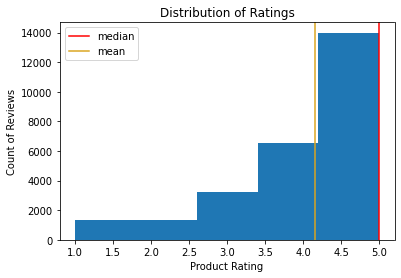

In [80]:
# distribution of ratings
plt.figure()
plt.hist(main_df['rating'], bins=5)
plt.xlabel('Product Rating')
plt.ylabel('Count of Reviews')
plt.title('Distribution of Ratings')
plt.axvline(main_df['rating'].median(), label='median', color='red')
plt.axvline(main_df['rating'].mean(), label='mean', color='goldenrod')
plt.legend()
plt.show()

In [81]:
print('The median rating is', main_df['rating'].median())
print('The mean rating is', main_df['rating'].mean())

The median rating is 5.0
The mean rating is 4.155634656164798


The ratings distribution suggests that the bulk of reviewers tend to give five-star reviews. Reviewers who are dissatisfied with their purchase tend to give 4-star reviews, which reflects why the mean rating is 4.12, which is still fairly high.

## Number of Reviews by Category

In this section, I will explore the number of reviews for the top 20 categories.

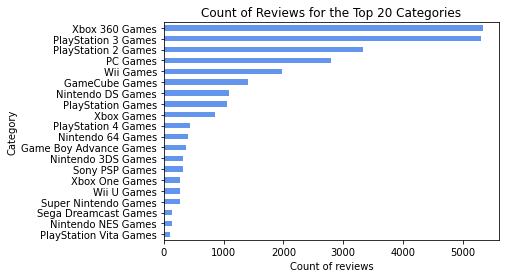

In [82]:
# Count of reviews for the top 20 categories
main_df['category'].value_counts().head(20).sort_values().plot(kind='barh', color='cornflowerblue')
plt.xlabel('Count of reviews')
plt.ylabel('Category')
plt.title('Count of Reviews for the Top 20 Categories')
plt.show()

We can see above that the PlayStation 3 Games category has the highest number of reviews, followed by Xbox 360 Games and PC Games.

## Average Rating by Category

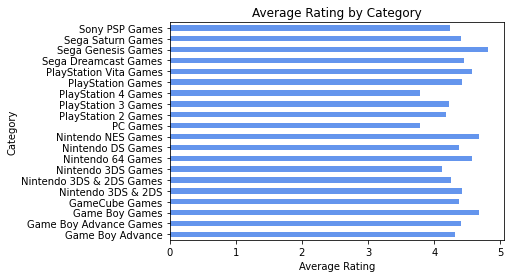

In [83]:
main_df.groupby(by='category')['rating'].mean().head(20).plot(kind='barh', color='cornflowerblue')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.title('Average Rating by Category')
plt.show()

In [84]:
average_rating_by_category = main_df.groupby('category')['rating'].agg(['mean', 'count'])

In [85]:
average_rating_by_category.sort_values(by=['mean'], ascending=False)

,mean,count
category,,
Sega Genesis Games,4.818182,22
Super Nintendo Games,4.788679,265
Game Boy Games,4.680000,25
Nintendo NES Games,4.671875,128
PlayStation Vita Games,4.576923,104
Nintendo 64 Games,4.569620,395
Sega Dreamcast Games,4.454545,132
PlayStation Games,4.412982,1063
Nintendo 3DS & 2DS,4.411765,51


For categories with more than 1000 reviews, the PlayStation Games category is the highest performing, with 1922 reviews and an average rating of 4.43.

The category with the most reviews is PlayStation 3, with an average rating of 4.17.

Xbox 360 Games and PC Games are the categories with a high quantity of reviews but a lower average rating, at 3.95 and 3.81, respectively.

PlayStation Vita, despite having only 13 reviews, has the lowest average rating at 2.76.

Also, it is interesting to note that the highest performing categories in terms of rating are Super Genesis Games and Super Nintendo Games, both considered ‘vintage’ for the purposes of this project given that Sega Genesis was first launched in 1988 and Super Nintendo was first launched in 1990. Given this, there seems to be a nostalgia factor when it comes to older games and their average product rating.

## Ratings over time

In [86]:
year_average_rating = main_df.groupby('year')['rating'].agg(['mean', 'count'])

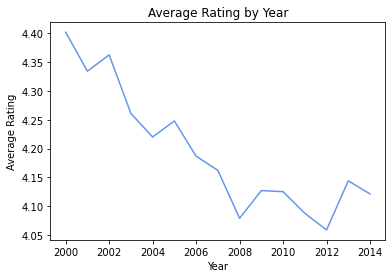

In [87]:
main_df.groupby(by='year')['rating'].mean().head(20).plot(kind='line', color='cornflowerblue')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Rating by Year')
plt.show()

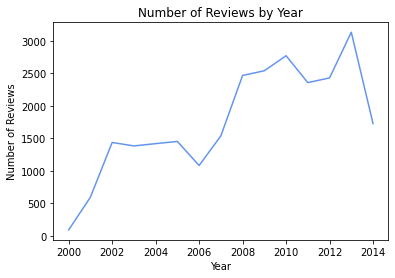

In [88]:
main_df.groupby(by='year')['rating'].count().head(20).plot(kind='line', color='cornflowerblue')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews by Year')
plt.show()

We can see in the two graphs above (Average Rating by Year and Number of Reviews by Year) that as the number of reviews increases by each passing year, the average rating decreases, with the share of negative ratings increasing year over year.

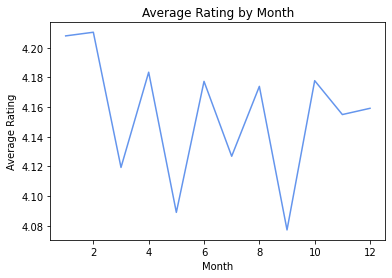

In [89]:
# average rating by calendar month
main_df.groupby(by='month')['rating'].mean().head(20).plot(kind='line', color='cornflowerblue')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.title('Average Rating by Month')
plt.show()

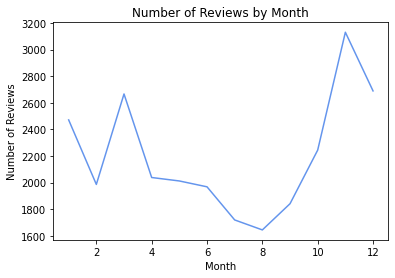

In [90]:
# number of reviews by calendar month
main_df.groupby(by='month')['rating'].count().head(20).plot(kind='line', color='cornflowerblue')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews by Month')
plt.show()

The average rating tends to be high in January, June, October, and December.

The number of reviews submitted tends to be high in January, March, November and December.

Despite having a large number of reviews in January, November and December, the average rating for these months is high. In contrast, the number of reviews submitted during the summer months is low, yet the average rating is high for this period. This suggests that there is an inverse relationship between the average rating and number of reviews submitted for most months, but during January, November, and December, ratings tend to be high despite the large quantity of reviews submitted.

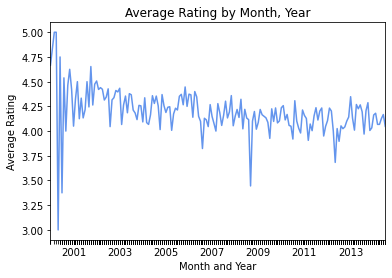

In [91]:
# average rating by month and year
main_df.groupby(by='month year')['rating'].mean().plot(kind='line', color='cornflowerblue')
plt.xlabel('Month and Year')
plt.ylabel('Average Rating')
plt.title('Average Rating by Month, Year')
plt.xticks(main_df['month year'])
plt.show()

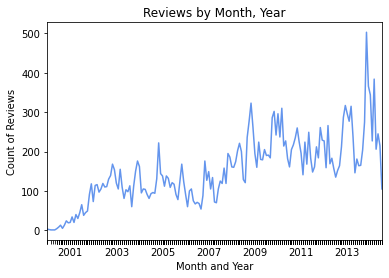

In [92]:
# number of reviews by month and year
main_df.groupby(by='month year')['rating'].count().plot(kind='line', color='cornflowerblue')
plt.xlabel('Month and Year')
plt.ylabel('Count of Reviews')
plt.title('Reviews by Month, Year')
plt.xticks(main_df['month year'])
plt.show()

## Helpfulness rating

I modified the `helpfulness_rating` column in the data cleaning section to exclude reviews that did not receive votes. This would allow for better analysis of the column and would prevent averages from being skewed by reviews that did not receive votes.


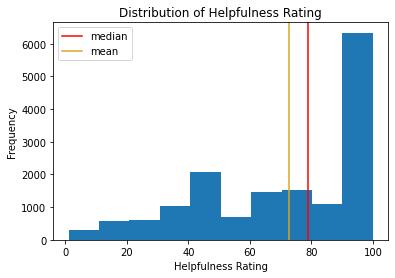

In [93]:
# distribution of helpfulness_rating
plt.figure()
plt.hist(main_df['helpfulness_rating'], bins=10)
plt.xlabel('Helpfulness Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Helpfulness Rating')
plt.axvline(main_df['helpfulness_rating'].median(), label='median', color='red')
plt.axvline(main_df['helpfulness_rating'].mean(), label='mean', color='goldenrod')
plt.legend()
plt.show()

In [94]:
print('The median helpfulness rating is', main_df['helpfulness_rating'].median())
print('The mean helpfulness rating is', main_df['helpfulness_rating'].mean())

The median helpfulness rating is 79.0
The mean helpfulness rating is 72.81130755532944


We can see that the median rating is 80%, while the mean is roughly at 73.5%.

An overwhelming majority of the ratings are at the 100% bin, but this is because many reviews have only received one vote.

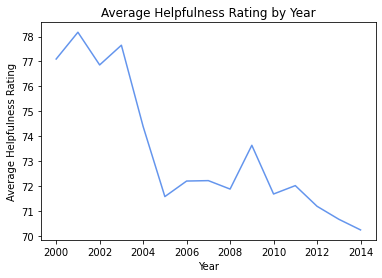

In [95]:
# helpfulness rating by year
main_df.groupby(by='year')['helpfulness_rating'].mean().head(20).plot(kind='line', color='cornflowerblue')
plt.xlabel('Year')
plt.ylabel('Average Helpfulness Rating')
plt.title('Average Helpfulness Rating by Year')
plt.show()

In the Average Helpfulness Rating by Year line graph above, we can see that the ratings start to decrease over time. This is because the number of votes inreased over time, resulting in more divergent opinions, dropping the average.

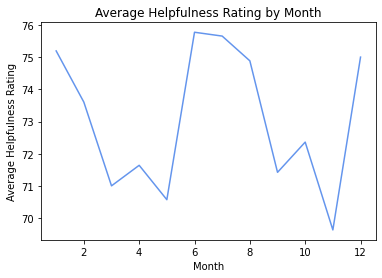

In [96]:
# helpfulness rating by month
main_df.groupby(by='month')['helpfulness_rating'].mean().head(20).plot(kind='line', color='cornflowerblue')
plt.xlabel('Month')
plt.ylabel('Average Helpfulness Rating')
plt.title('Average Helpfulness Rating by Month')
plt.show()

In the Average Helpfulness Rating by Month line graph above, we can see that reviews posted in January, June, July, and December tend to get the highest average ratings. January and December as a result of the Christmas shopping season, and June and July because of summer vacation for students in K-12.

In the total votes section, we'll be able to see the total votes cast by calendar month. We'll be able to see that while votes are high in January and December, it is actually quite low during the summer months.

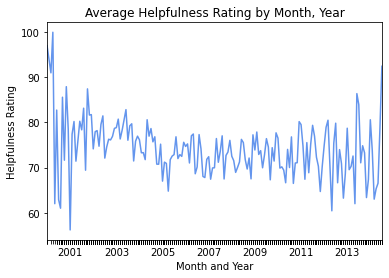

In [97]:
# average helpfulness rating by month and year
main_df.groupby(by='month year')['helpfulness_rating'].mean().plot(kind='line', color='cornflowerblue')
plt.xlabel('Month and Year')
plt.ylabel('Helpfulness Rating')
plt.title('Average Helpfulness Rating by Month, Year')
plt.xticks(main_df['month year'])
plt.show()

In [98]:
# show average helpfulness rating by month-year
pd.set_option('display.max_rows', None)
avg_helpfulness_rating_month_year = main_df.groupby(by='month year')['helpfulness_rating'].mean()
avg_helpfulness_rating_month_year

month year
2000-01     97.000000
2000-03     91.000000
2000-04    100.000000
2000-05     62.000000
2000-06     82.750000
2000-07     62.875000
2000-08     61.000000
2000-09     85.600000
2000-10     71.636364
2000-11     87.937500
2000-12     78.454545
2001-01     56.187500
2001-02     77.409091
2001-03     80.214286
2001-04     71.423077
2001-05     75.782609
2001-06     80.269231
2001-07     78.369565
2001-08     83.166667
2001-09     69.419355
2001-10     87.450000
2001-11     81.649123
2001-12     81.740260
2002-01     74.150000
2002-02     77.957746
2002-03     78.196970
2002-04     74.737705
2002-05     79.571429
2002-06     81.461538
2002-07     72.106061
2002-08     74.584615
2002-09     76.285714
2002-10     76.135417
2002-11     76.916667
2002-12     78.696078
2003-01     78.857143
2003-02     80.742424
2003-03     76.345238
2003-04     78.260870
2003-05     80.521739
2003-06     82.844828
2003-07     76.062500
2003-08     79.271186
2003-09     79.710526
2003-10     71.466667

By looking at the overall trend on a month-year basis, we can see that the trend over time is in the mid 70s range, more consistent with the overall helpfulness mean rating of 73.5%. This suggests that while a majority of votes are placed to indicate that helpfulness, a significant minority of votes are placed to indicate unhelpfulness, pulling the average down, but not to the point where it ever goes below 50%.

## Total votes

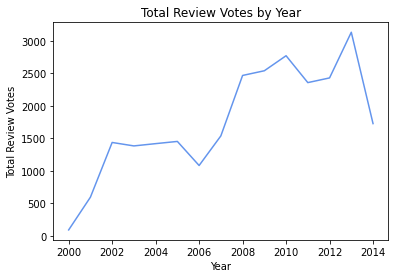

In [99]:
# total votes by calendar year
main_df.groupby(by='year')['total_votes'].count().head(20).plot(kind='line', color='cornflowerblue')
plt.xlabel('Year')
plt.ylabel('Total Review Votes')
plt.title('Total Review Votes by Year')
plt.show()

In the Total Review Votes by Year line graph above, we can see that the number of reviews given per calendar year has increased over time. As mentioned in the previous section, the higher the number of review votes, the lower the average rating per calendar year.

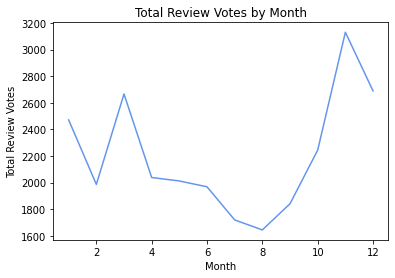

In [100]:
# total votes by calendar month
main_df.groupby(by='month')['total_votes'].count().head(20).plot(kind='line', color='cornflowerblue')
plt.xlabel('Month')
plt.ylabel('Total Review Votes')
plt.title('Total Review Votes by Month')
plt.show()

The data indicated in the Total Review Votes by Month above is somewhat consistent with the average helpfulness rating data in the previous section. Votes tend to be cast in January, March, November, and December. Interestingly, reviews are lower during the summer vacation months.

It seems that there is an inverse relationship between the number of votes cast during the summer months and their corresponding average rating. 

For January and December, while the number of votes is high, the average rating is also high.

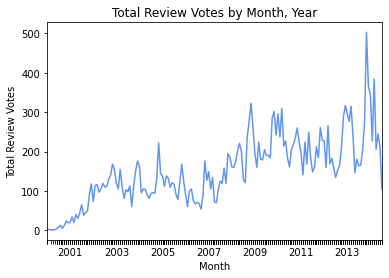

In [101]:
# total votes by month and year
main_df.groupby(by='month year')['total_votes'].count().plot(kind='line', color='cornflowerblue')
plt.xlabel('Month')
plt.ylabel('Total Review Votes')
plt.title('Total Review Votes by Month, Year')
plt.xticks(main_df['month year'])
plt.show()

Consistent with the year view, if we look at the total review votes cast by month and year, we can see that the number of votes cast has trended upwards over time.

## Unique reviewers

We can expect the number of unique reviewers over time to closely match the number of total votes cast over time.

Please note that the `main_df` only includes reviewers who gave 8 reviews and above.

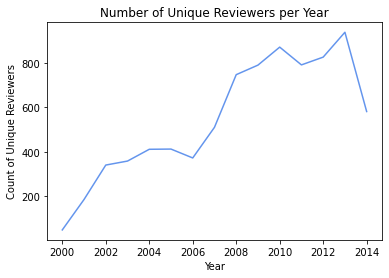

In [102]:
# unique reviewers by year
main_df.groupby(by='year')['reviewerID'].nunique().plot(kind='line', color='cornflowerblue')
plt.xlabel('Year')
plt.ylabel('Count of Unique Reviewers')
plt.title('Number of Unique Reviewers per Year')
plt.show()

We can see in the graph above that the number of unique reviewers has increased over time by calendar year.

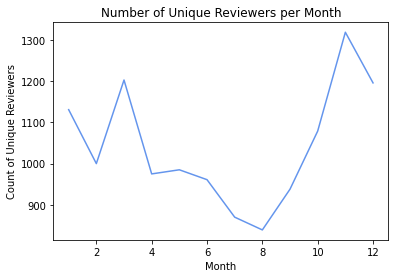

In [103]:
# unique reviewers by month
main_df.groupby(by='month')['reviewerID'].nunique().plot(kind='line', color='cornflowerblue')
plt.xlabel('Month')
plt.ylabel('Count of Unique Reviewers')
plt.title('Number of Unique Reviewers per Month')
plt.show()

At the calendar month level, the number of unique reviewers is high in January, November, and December, but surprisingly low during the summer vacation months. This suggests that most reviewers are adults, not students of K-12 age.

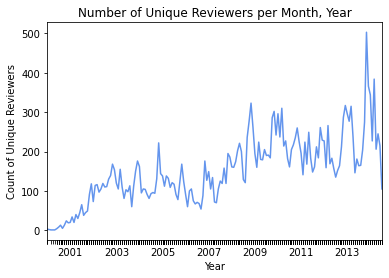

In [104]:
# unique reviewers by month year
main_df.groupby(by='month year')['reviewerID'].count().plot(kind='line', color='cornflowerblue')
plt.xlabel('Year')
plt.ylabel('Count of Unique Reviewers')
plt.title('Number of Unique Reviewers per Month, Year')
plt.xticks(main_df['month year'])
plt.show()

At the month-year view, we can see that the number of unique reviewers per month, year increased over time, significantly so after 2007.

## Unique products reviewed

Please note that the `main_df` dataframe was adjusted to only include products that have a minimum of 26 reviews.

The data in this section closely aligns with the data shown in the total votes and the helpfulness rating sections.

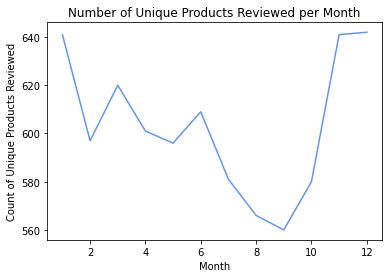

In [105]:
# unique products reviewed by month
main_df.groupby(by='month')['productID'].nunique().plot(kind='line', color='cornflowerblue')
plt.xlabel('Month')
plt.ylabel('Count of Unique Products Reviewed')
plt.title('Number of Unique Products Reviewed per Month')
plt.show()

We can see that the number of unique products reviewed tends to be high in January, November, and December.

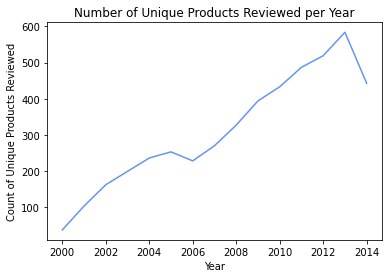

In [106]:
# unique products reviewed by year
main_df.groupby(by='year')['productID'].nunique().plot(kind='line', color='cornflowerblue')
plt.xlabel('Year')
plt.ylabel('Count of Unique Products Reviewed')
plt.title('Number of Unique Products Reviewed per Year')
plt.show()

Over the years, the number of unique products reviewed has steadily increased.

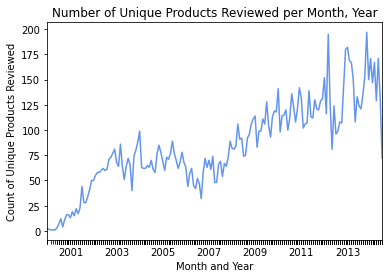

In [107]:
# unique products reviewed by month year
main_df.groupby(by='month year')['productID'].nunique().plot(kind='line', color='cornflowerblue')
plt.xlabel('Month and Year')
plt.ylabel('Count of Unique Products Reviewed')
plt.title('Number of Unique Products Reviewed per Month, Year')
plt.xticks(main_df['month year'])
plt.show()

Data shown above closely aligns with the calendar year view.

# Export

In [108]:
from google.colab import drive

drive.mount('/content/drive')
path = '/content/drive/My Drive/capstone/video game 5-core/capstone final submission/main_df_updated.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  main_df.to_csv(f)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
